In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from matplotlib.lines import Line2D 
from scipy.stats import norm

In [2]:
def plot_mse(df_mse, UorV=['U'], kernel=['rbf'], estimator=['ipr', 'nrm'], col="facet_blocks", col_wrap=3):
    g = sns.catplot(data=df_mse[(df_mse['kernel'].isin(kernel)) & (df_mse['type'].isin(UorV)) & (df_mse['estimator'].isin(estimator))],
        x="x",   
        y="MSE", 
        hue="method_name",
        palette='tab20', 
        col=col, 
        kind="bar",
        height=4,
        aspect=1.2,
        sharey=False,
        sharex=False,
        col_wrap=col_wrap
    )
    g.set_titles("{col_name}")
    plt.show()

# RESULTS

## Standard comparison

In [29]:
df_mse = pd.read_csv('results/results_standard_mse.csv', index_col=0)

### Figure 1

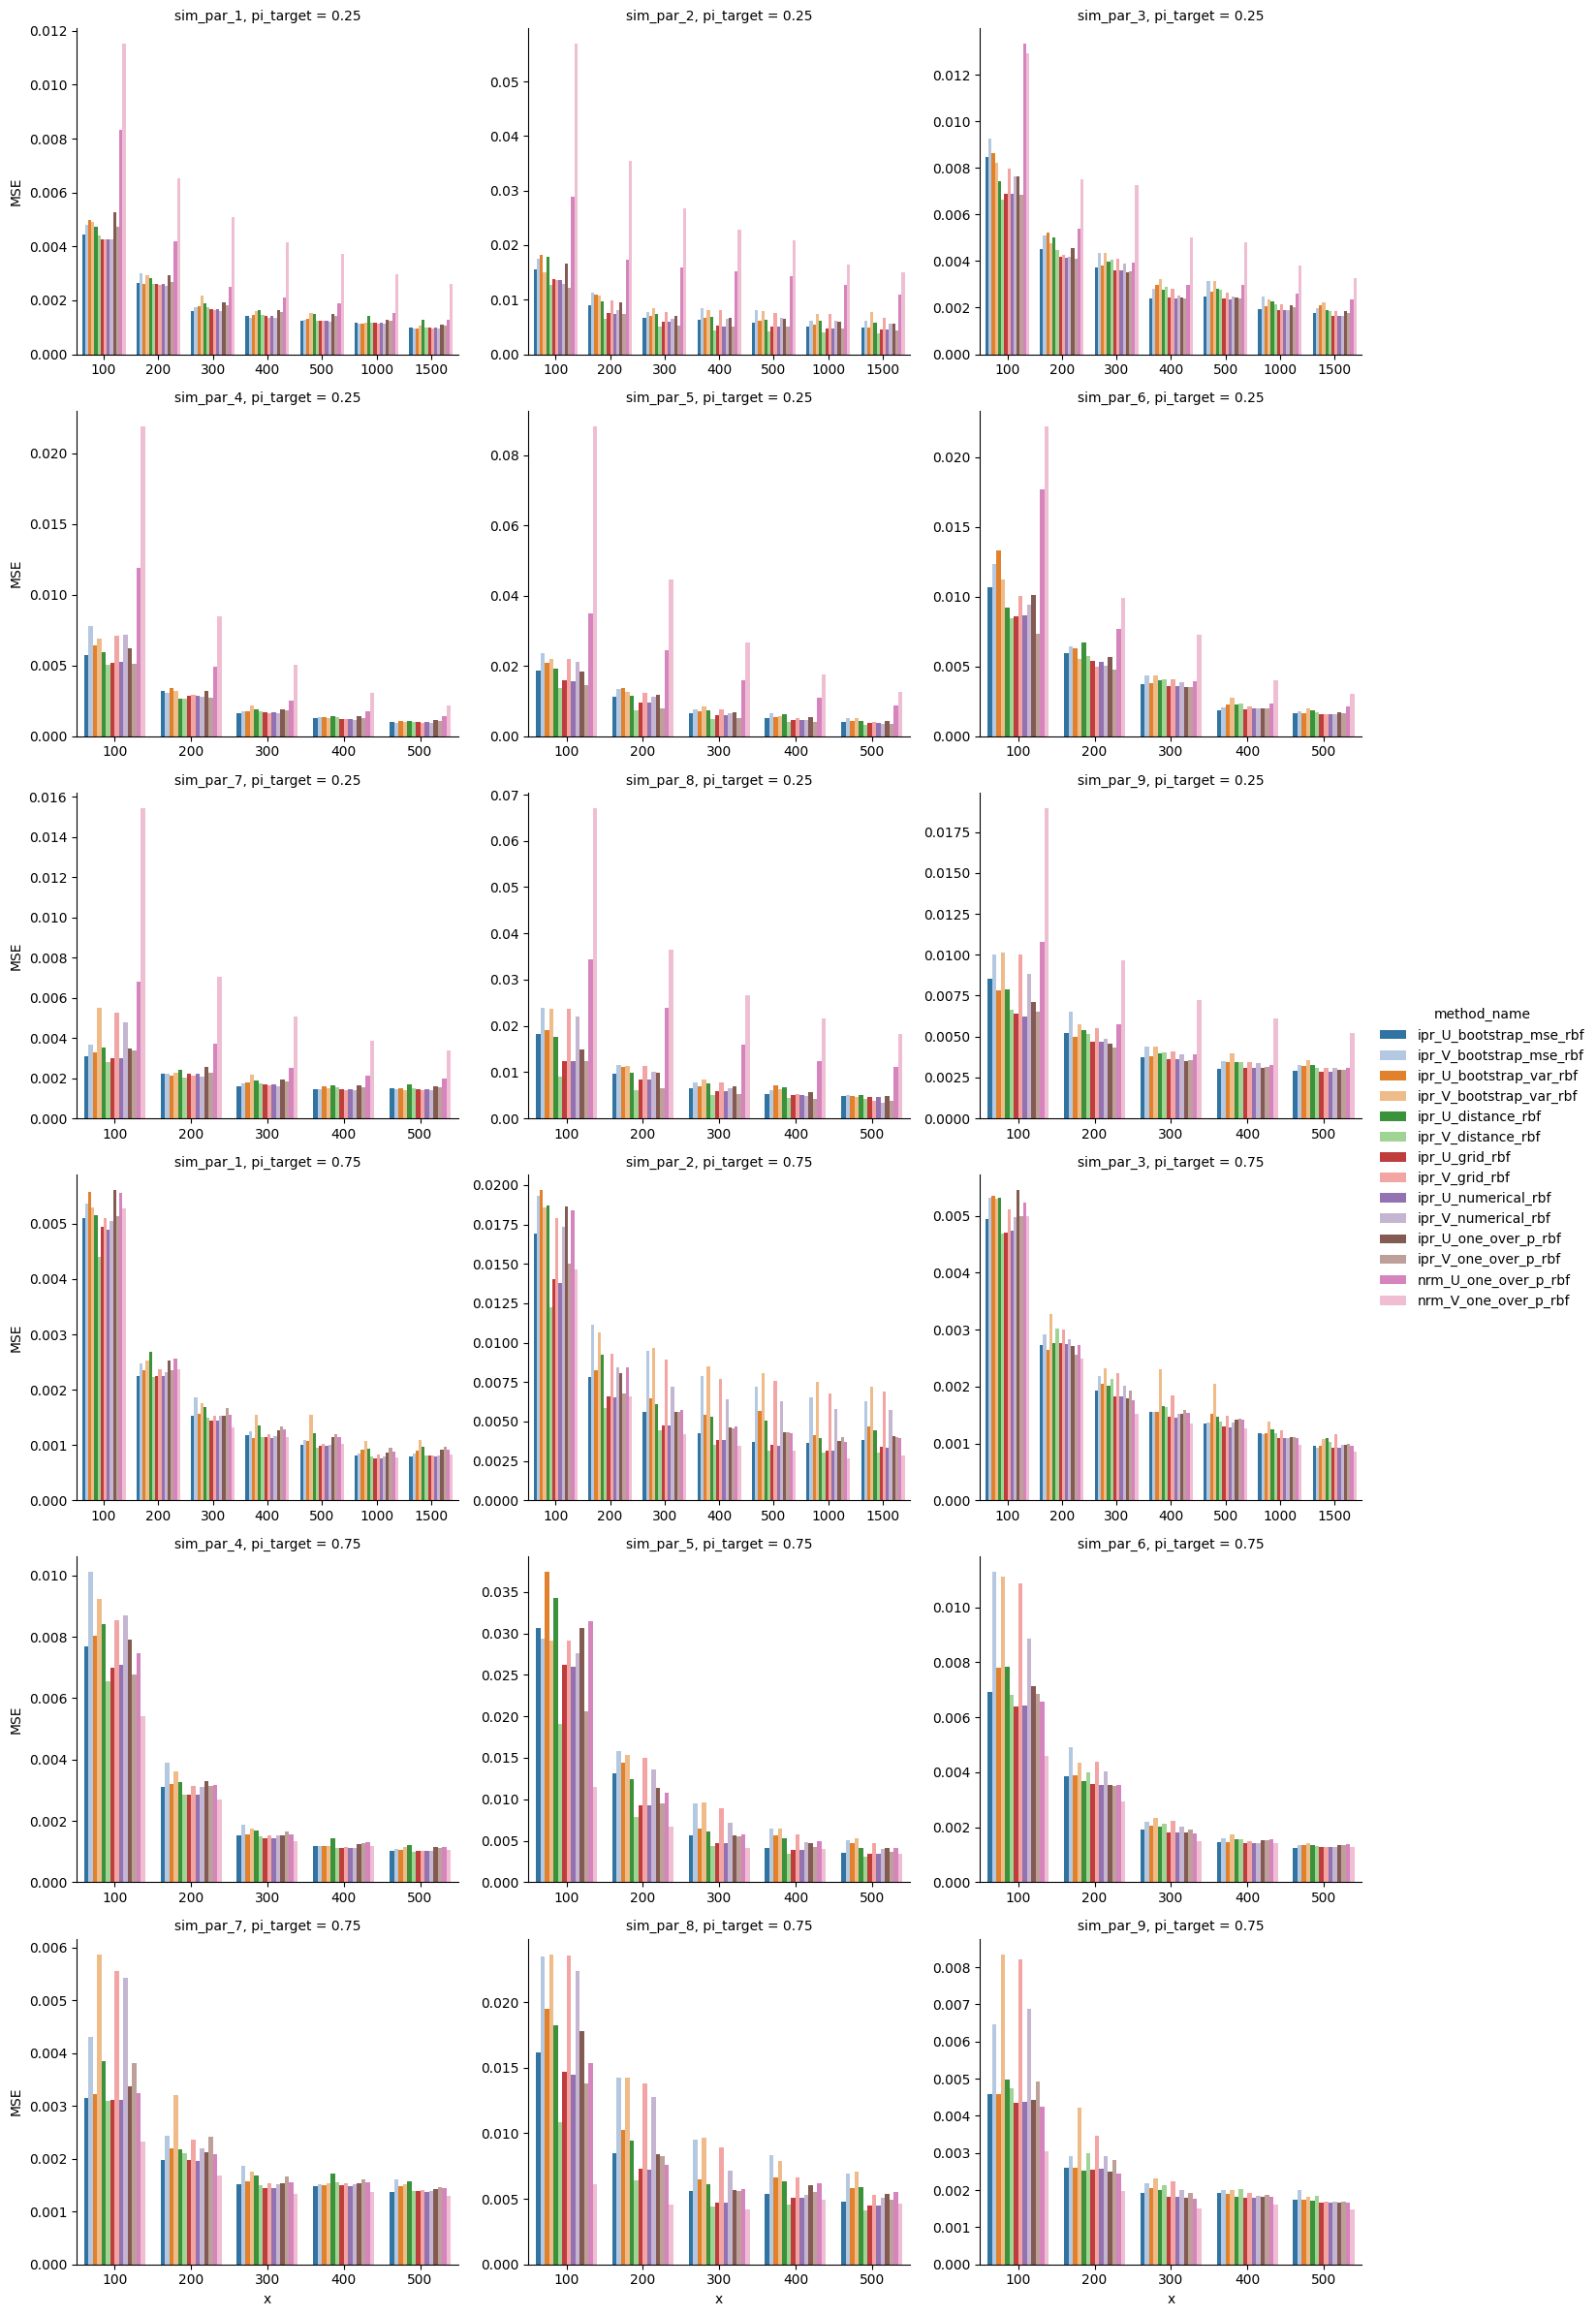

In [30]:
plot_mse(df_mse, ['U', 'V'], ['rbf'], ['ipr', 'nrm'])

### Figure 2

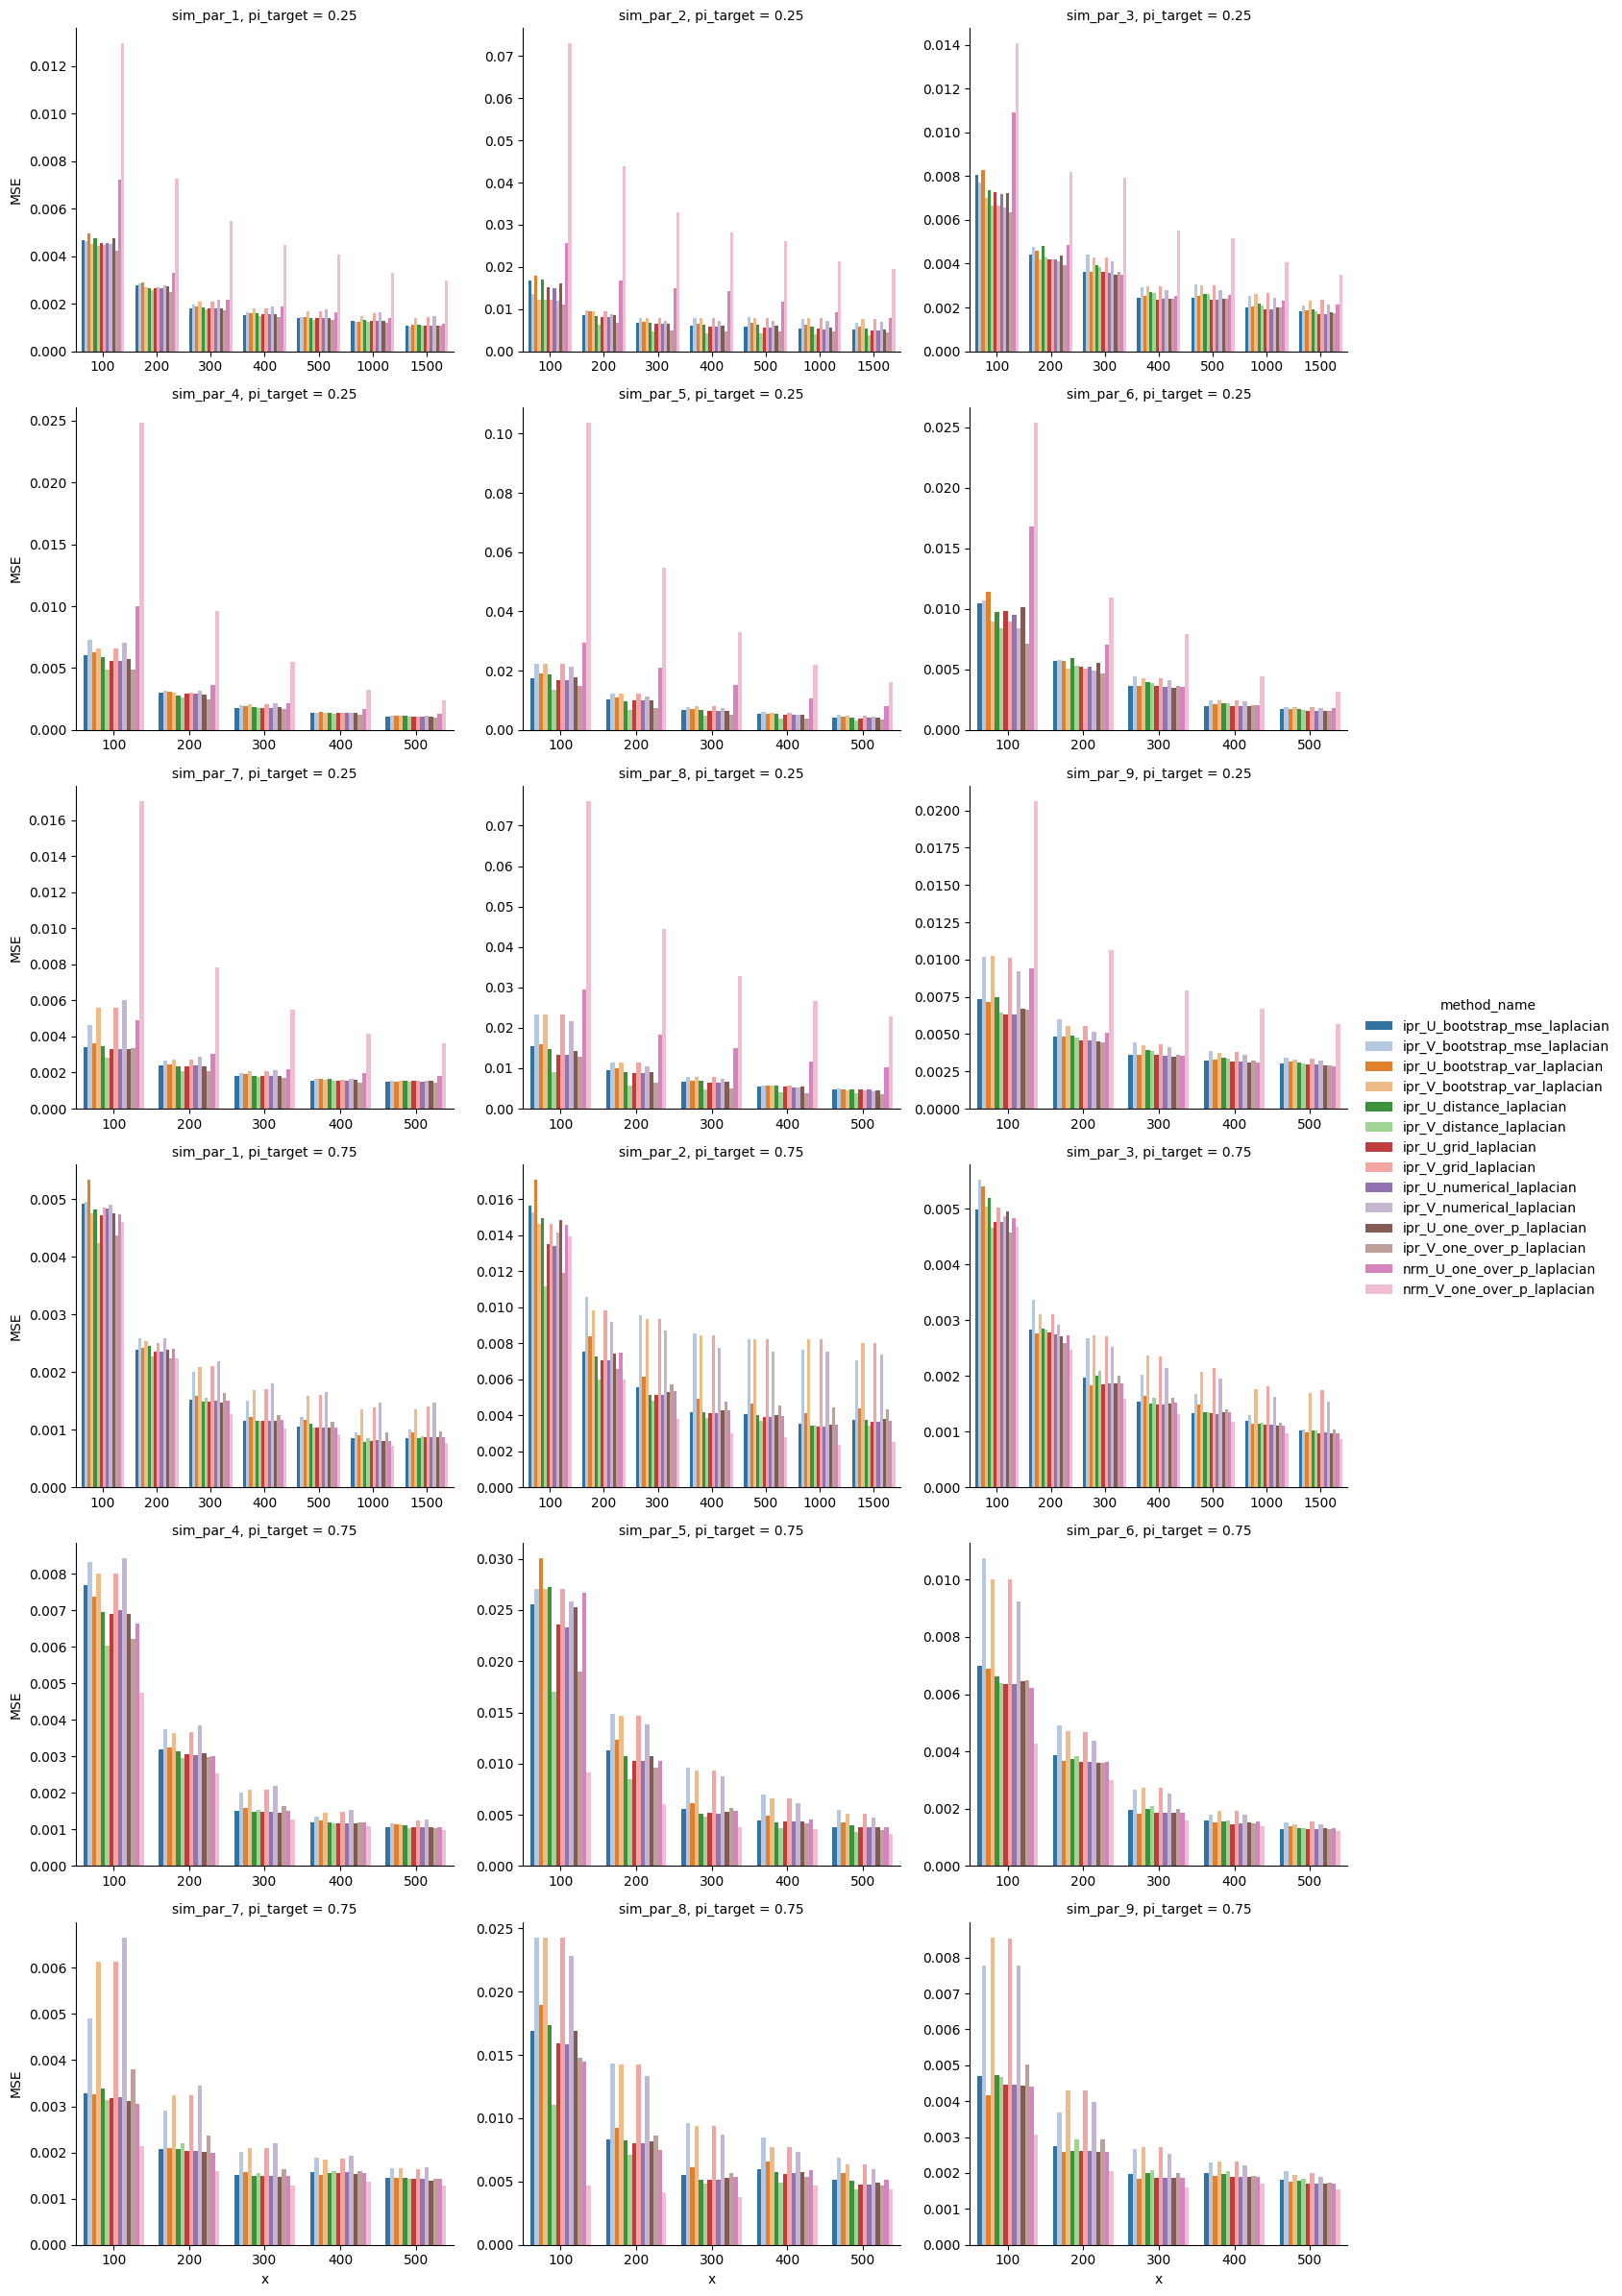

In [5]:
plot_mse(df_mse, ['U', 'V'], ['laplacian'], ['ipr', 'nrm'])

### Figure 3

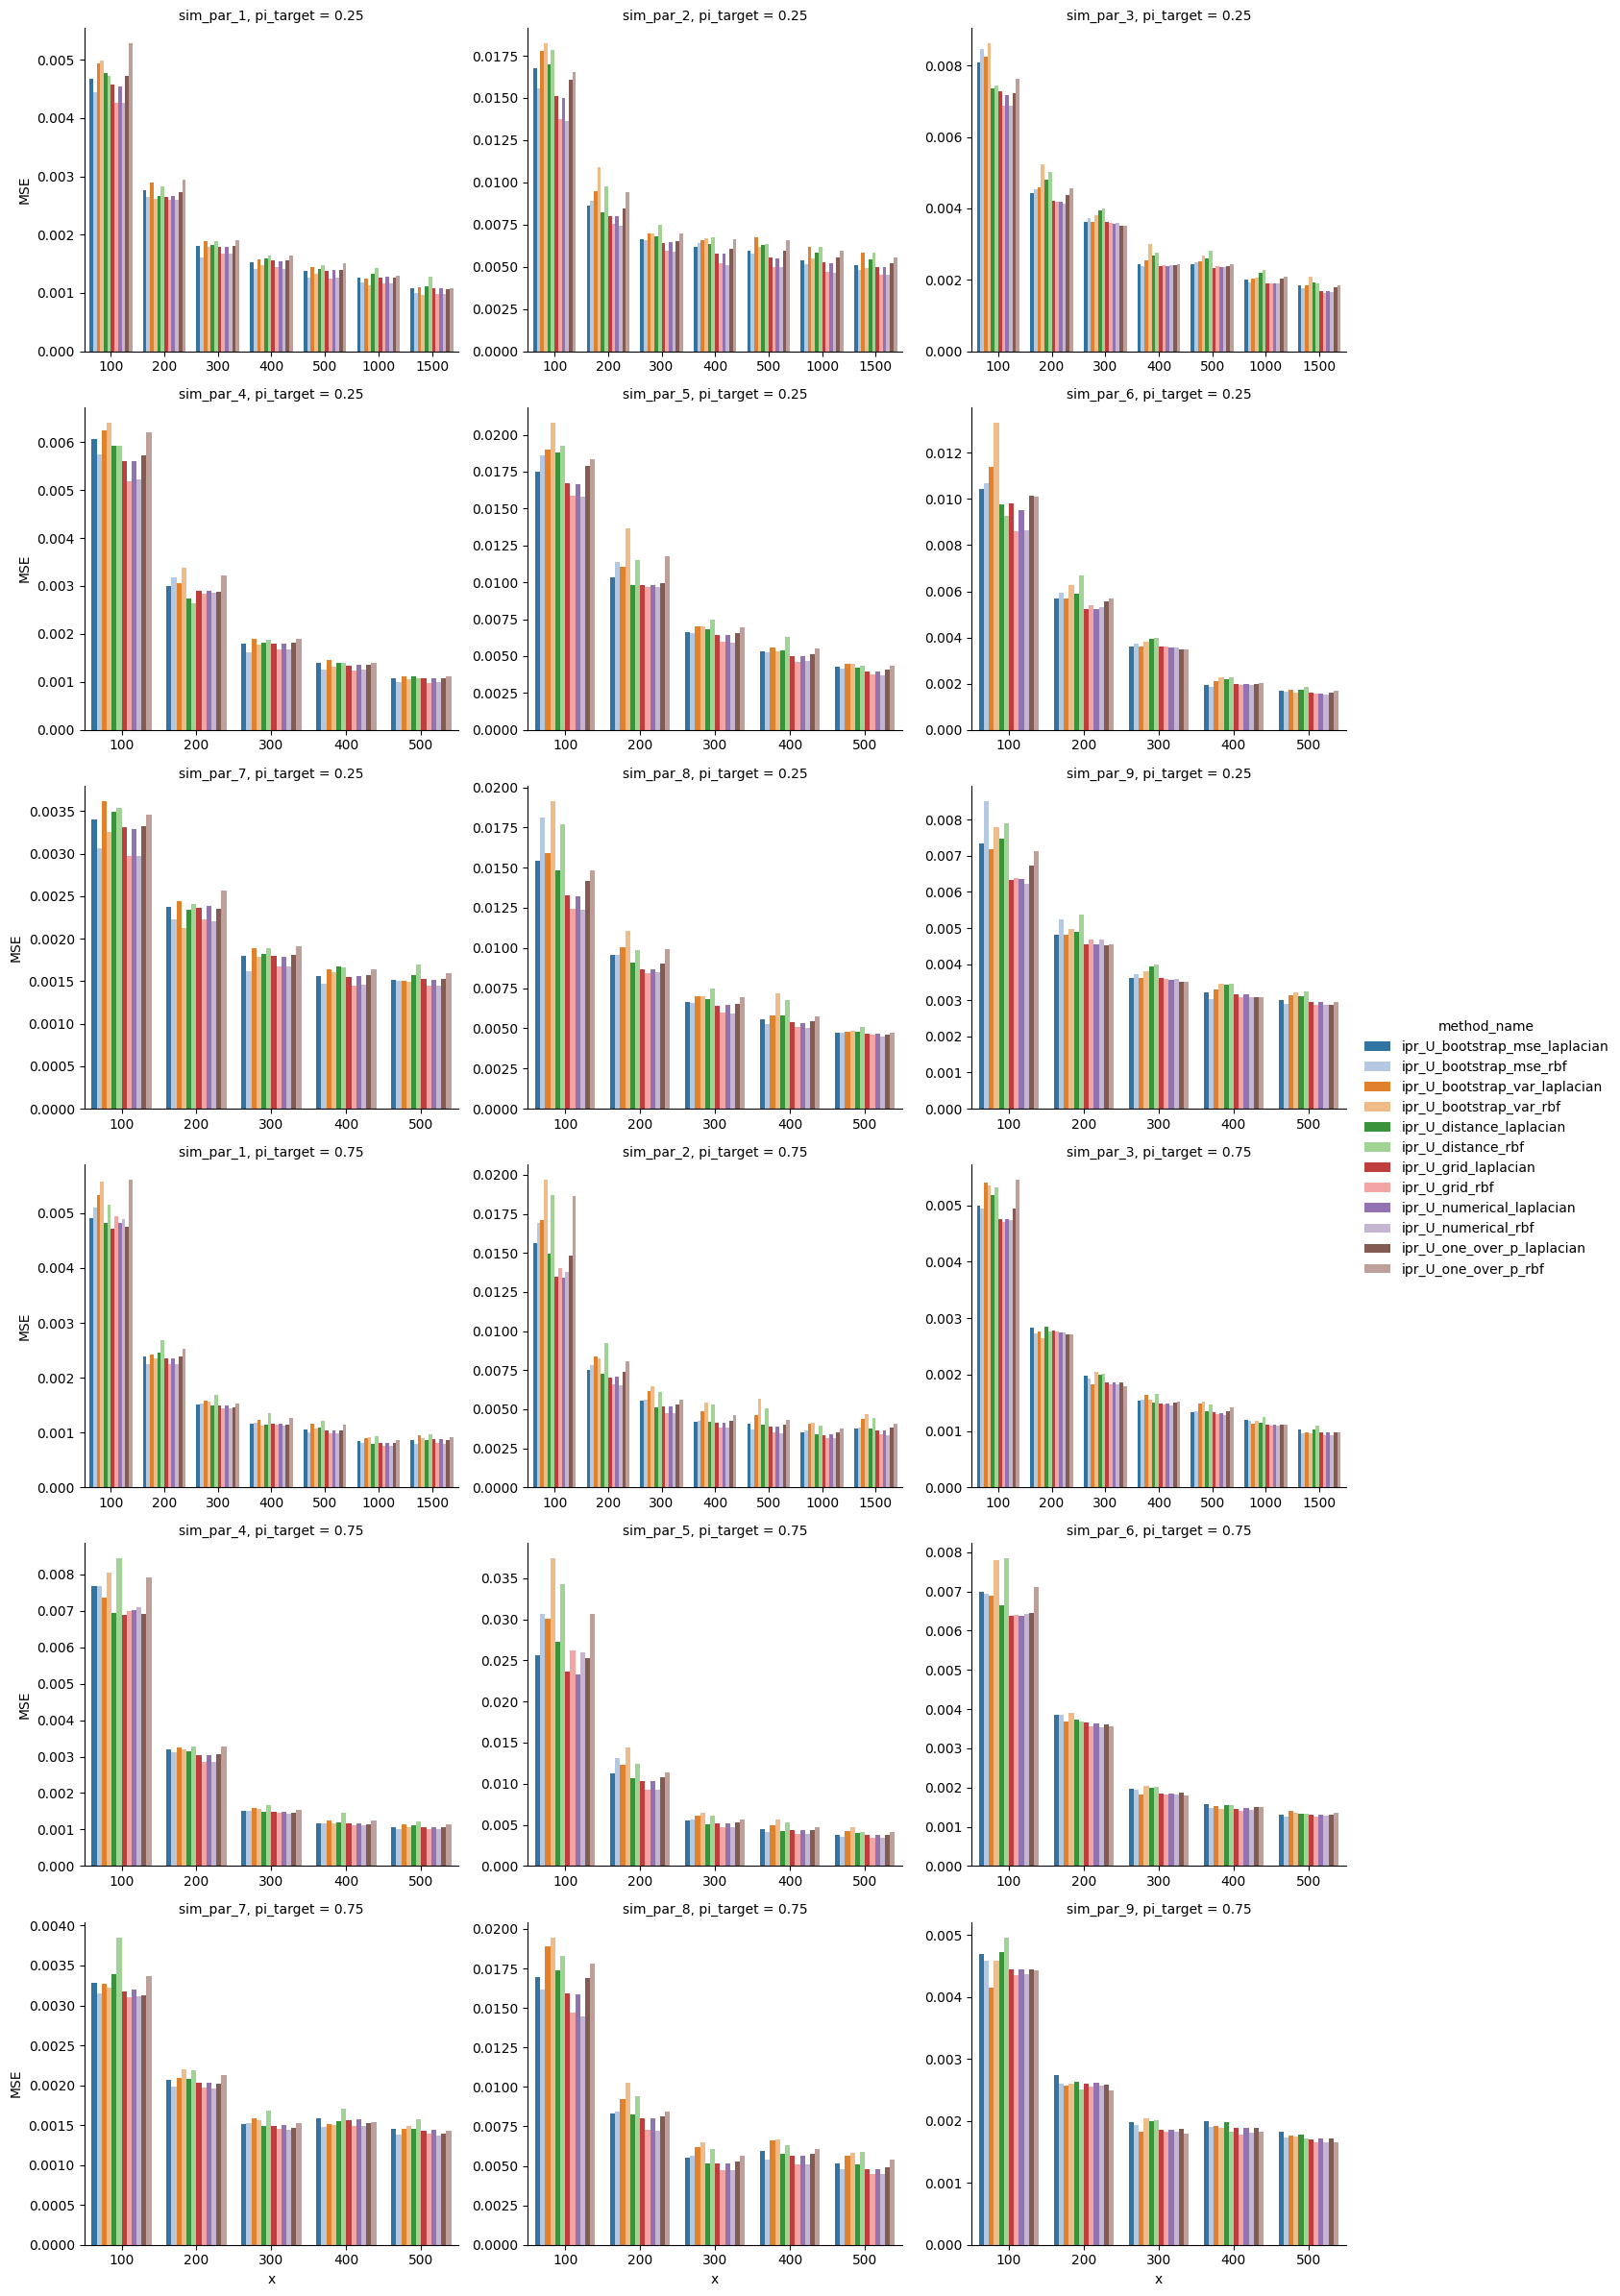

In [6]:
plot_mse(df_mse, ['U'], ['rbf', 'laplacian'], ['ipr'])

### Figure 4

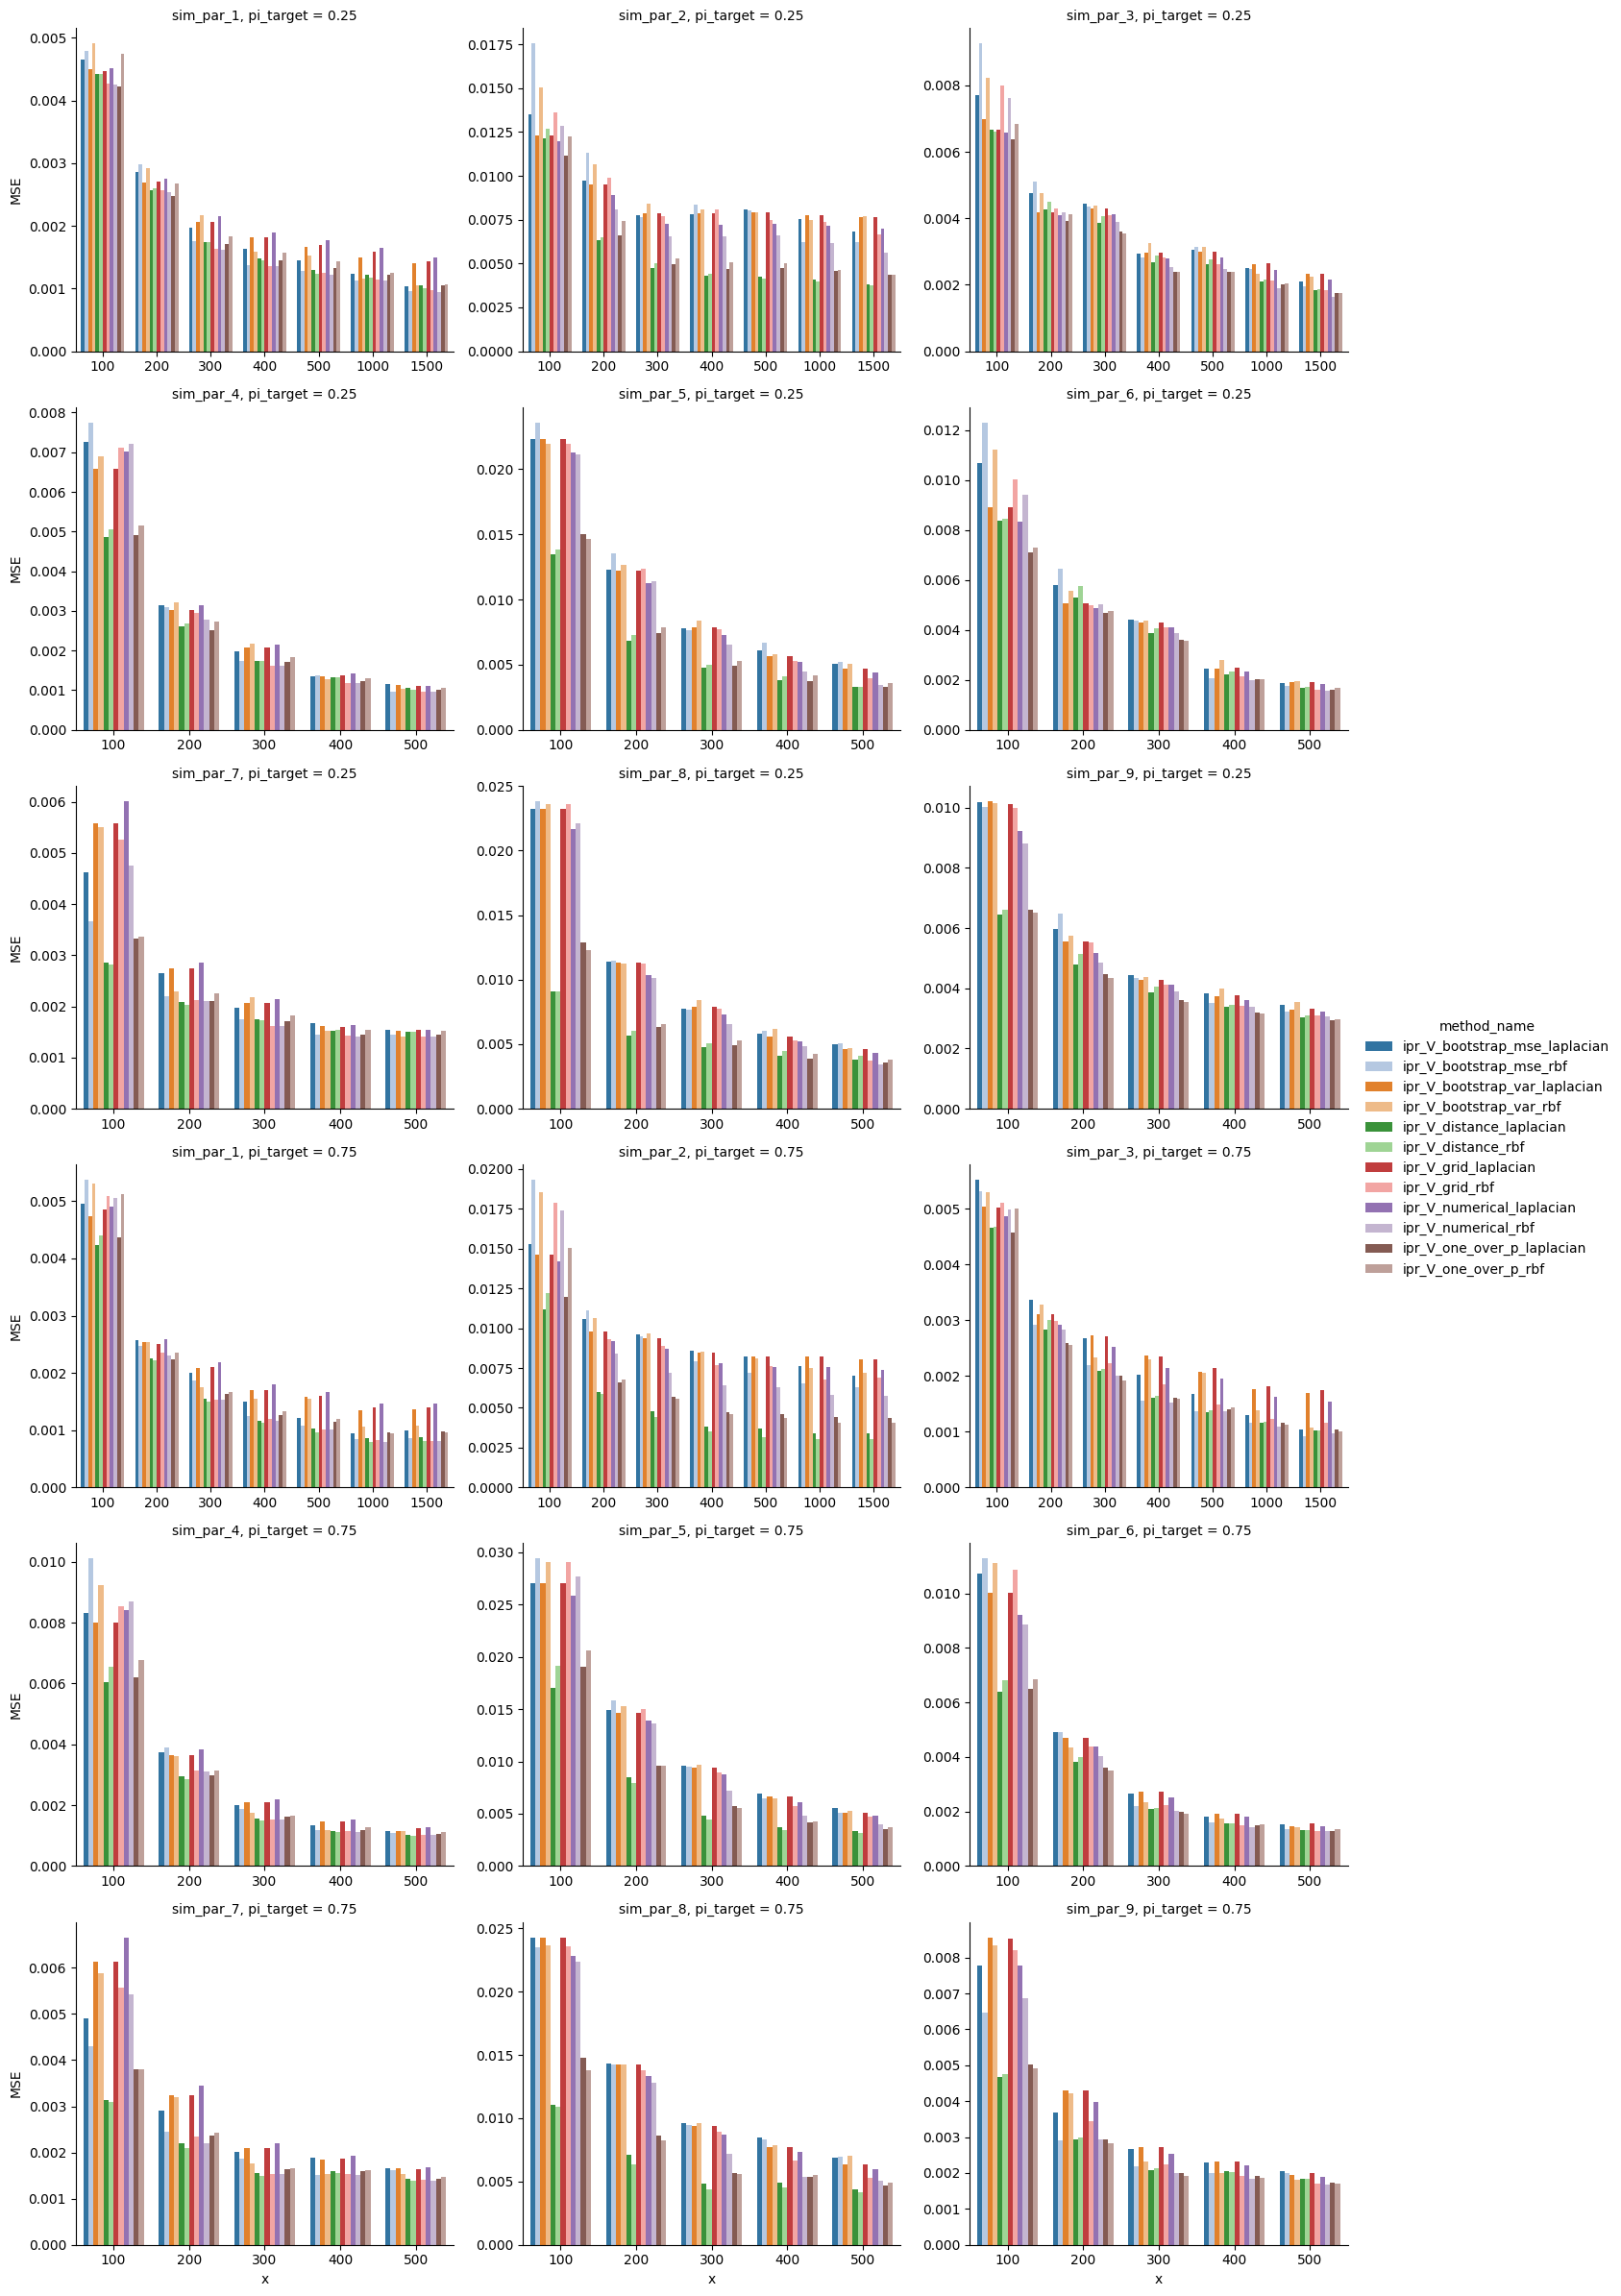

In [7]:
plot_mse(df_mse, ['V'], ['rbf', 'laplacian'], ['ipr'])

### Table 1

In [8]:
df_mse_tmp = copy.copy(df_mse)
df_mse_tmp = df_mse_tmp.loc[df_mse_tmp['n_target'] <= 500,:]

In [9]:
df_mse_tmp['rank']=df_mse_tmp.groupby(['sim_scenario','n_plus','n_minus','n_target','pi_target']).rank(method='dense', ascending=True)['MSE']

In [10]:
df_mse_tmp[['method_name', 'rank', 'count_sim']].groupby(['method_name']).agg('mean').reset_index().sort_values('rank').reset_index(drop=True)

,method_name,rank,count_sim
0,ipr_U_numerical_rbf,5.366667,100.0
1,ipr_U_grid_rbf,5.788889,100.0
2,ipr_V_one_over_p_laplacian,8.411111,100.0
3,ipr_V_distance_laplacian,8.522222,100.0
4,ipr_V_distance_rbf,8.633333,100.0
5,ipr_U_grid_laplacian,9.277778,100.0
6,ipr_U_numerical_laplacian,9.300000,100.0
7,ipr_U_one_over_p_laplacian,10.300000,100.0
8,ipr_V_one_over_p_rbf,10.677778,100.0
9,ipr_U_bootstrap_mse_rbf,11.066667,100.0


### Figure 5

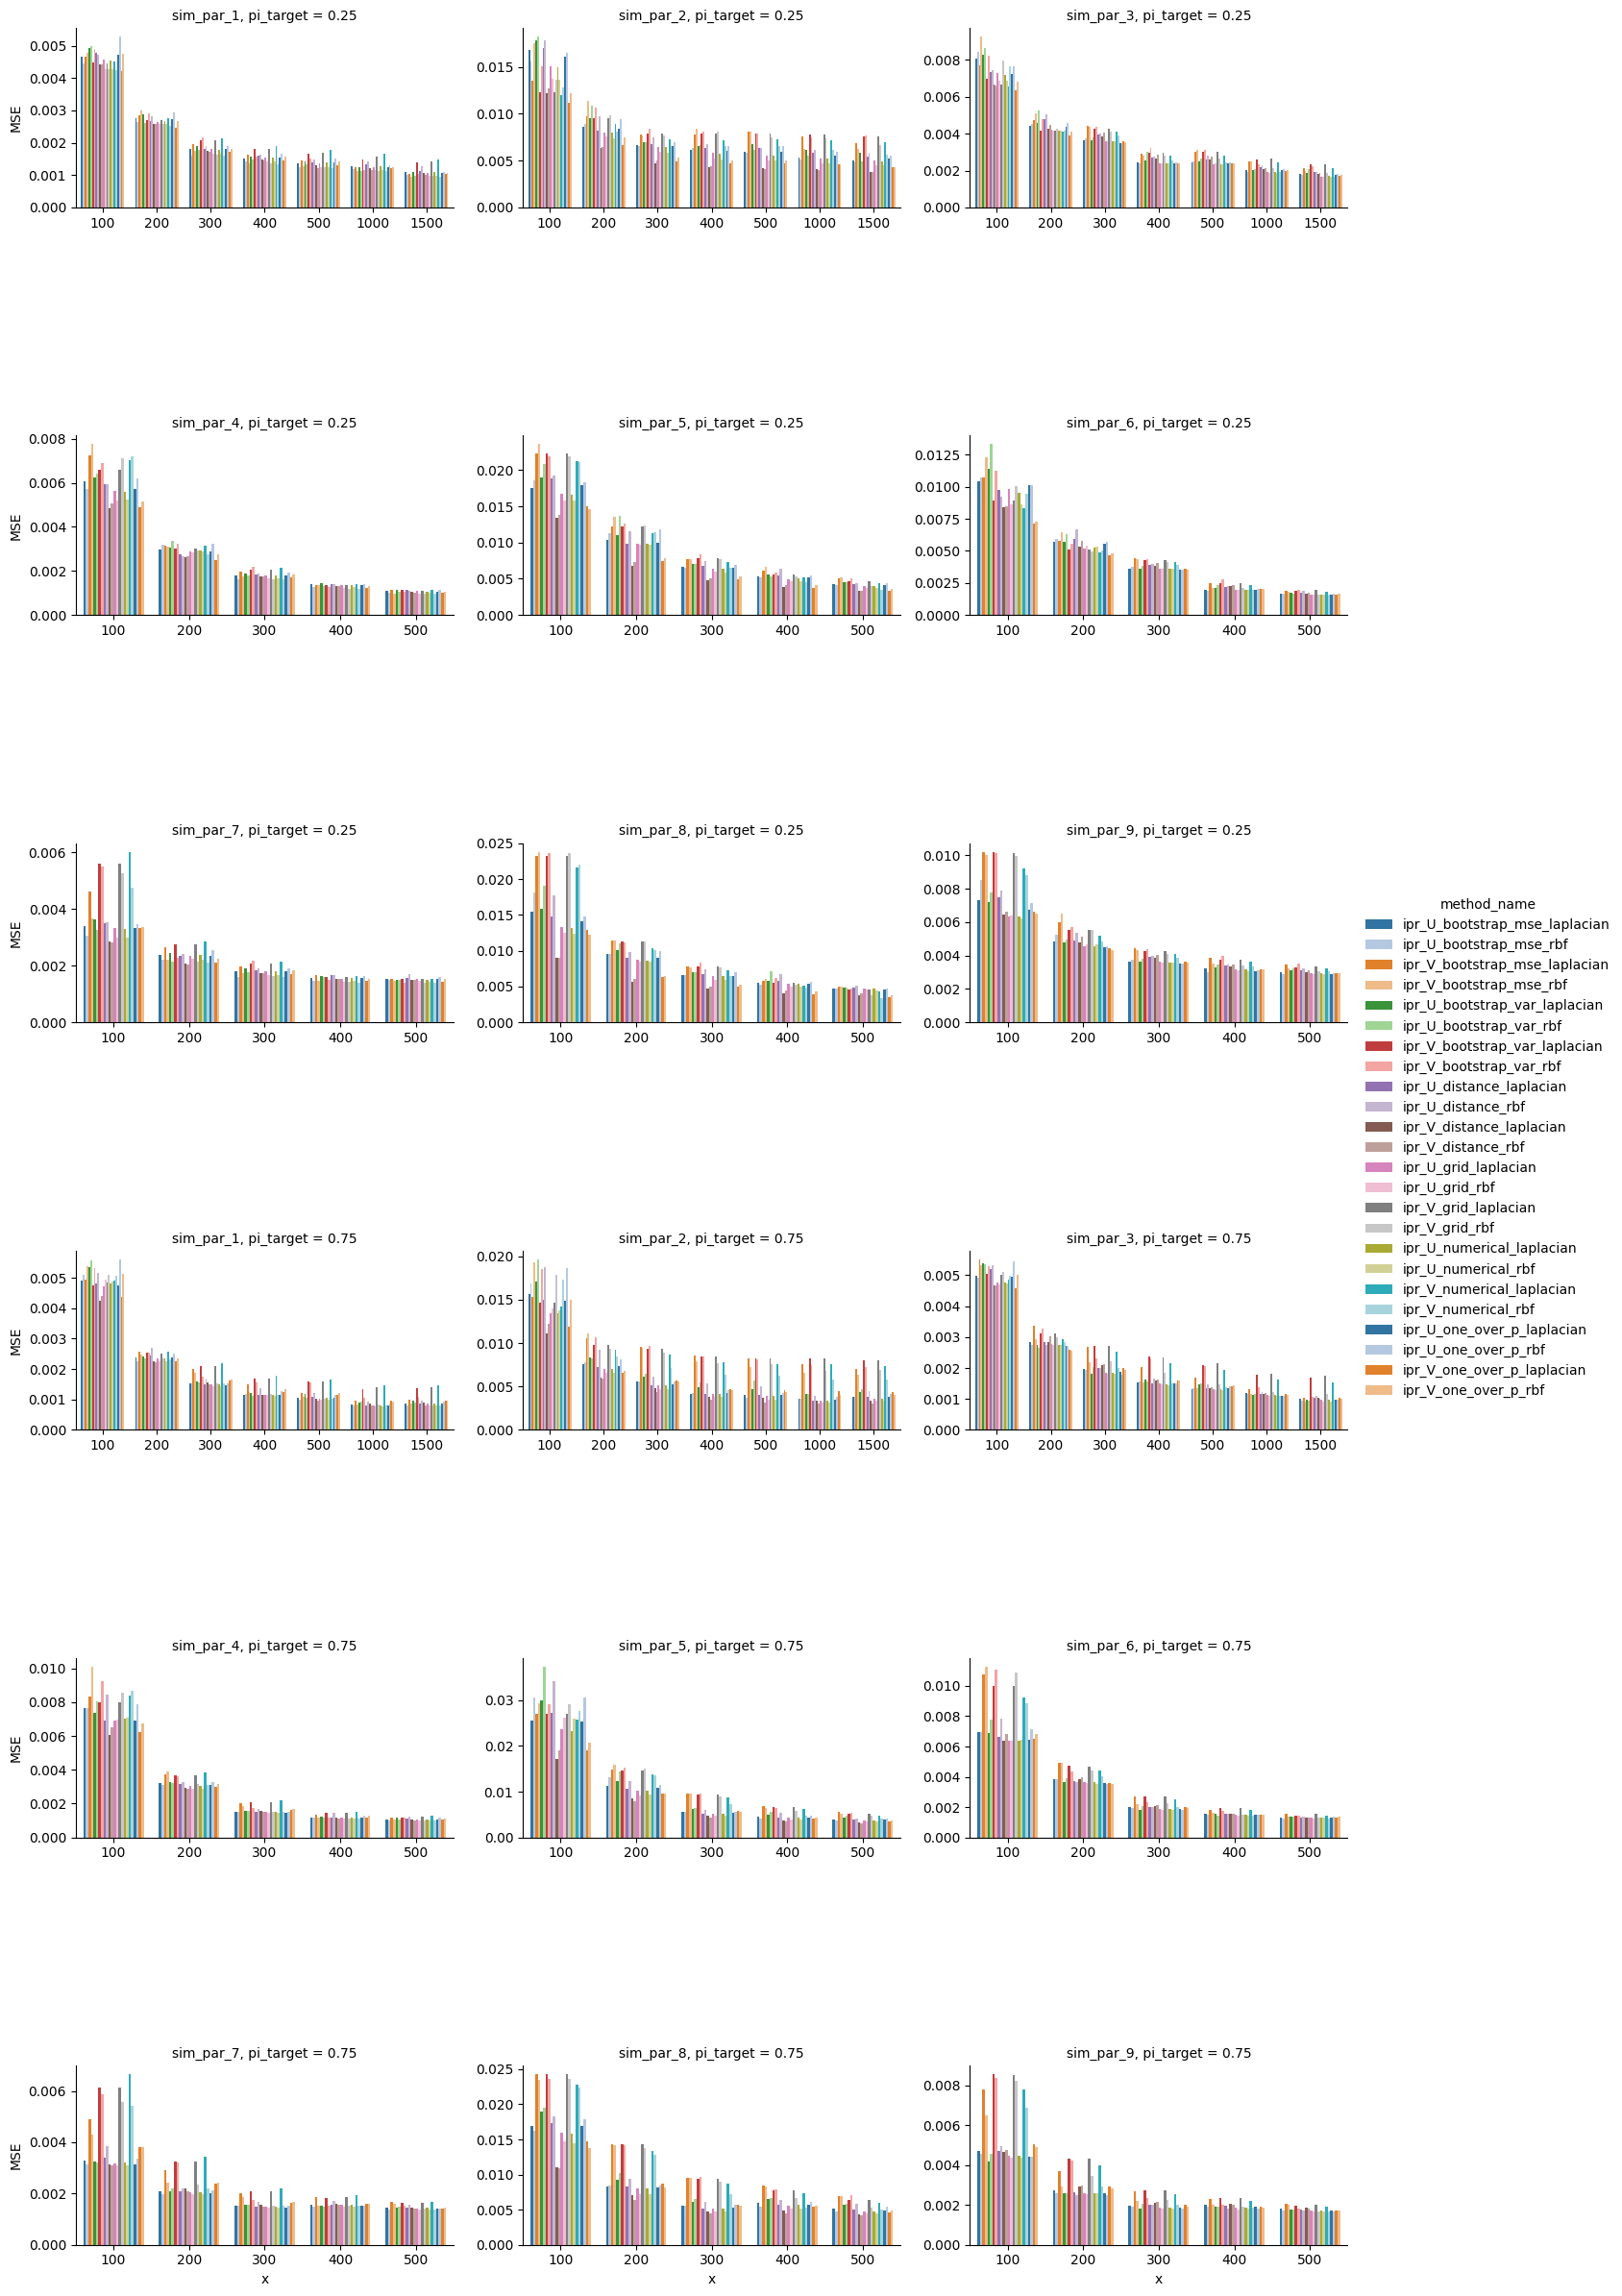

In [11]:
plot_mse(df_mse, ['U', 'V'], ['rbf', 'laplacian'], ['ipr'])

## Dimension

In [12]:
df_mse = pd.read_csv('results/results_dimension_mse.csv', index_col=0)

### Figure 6

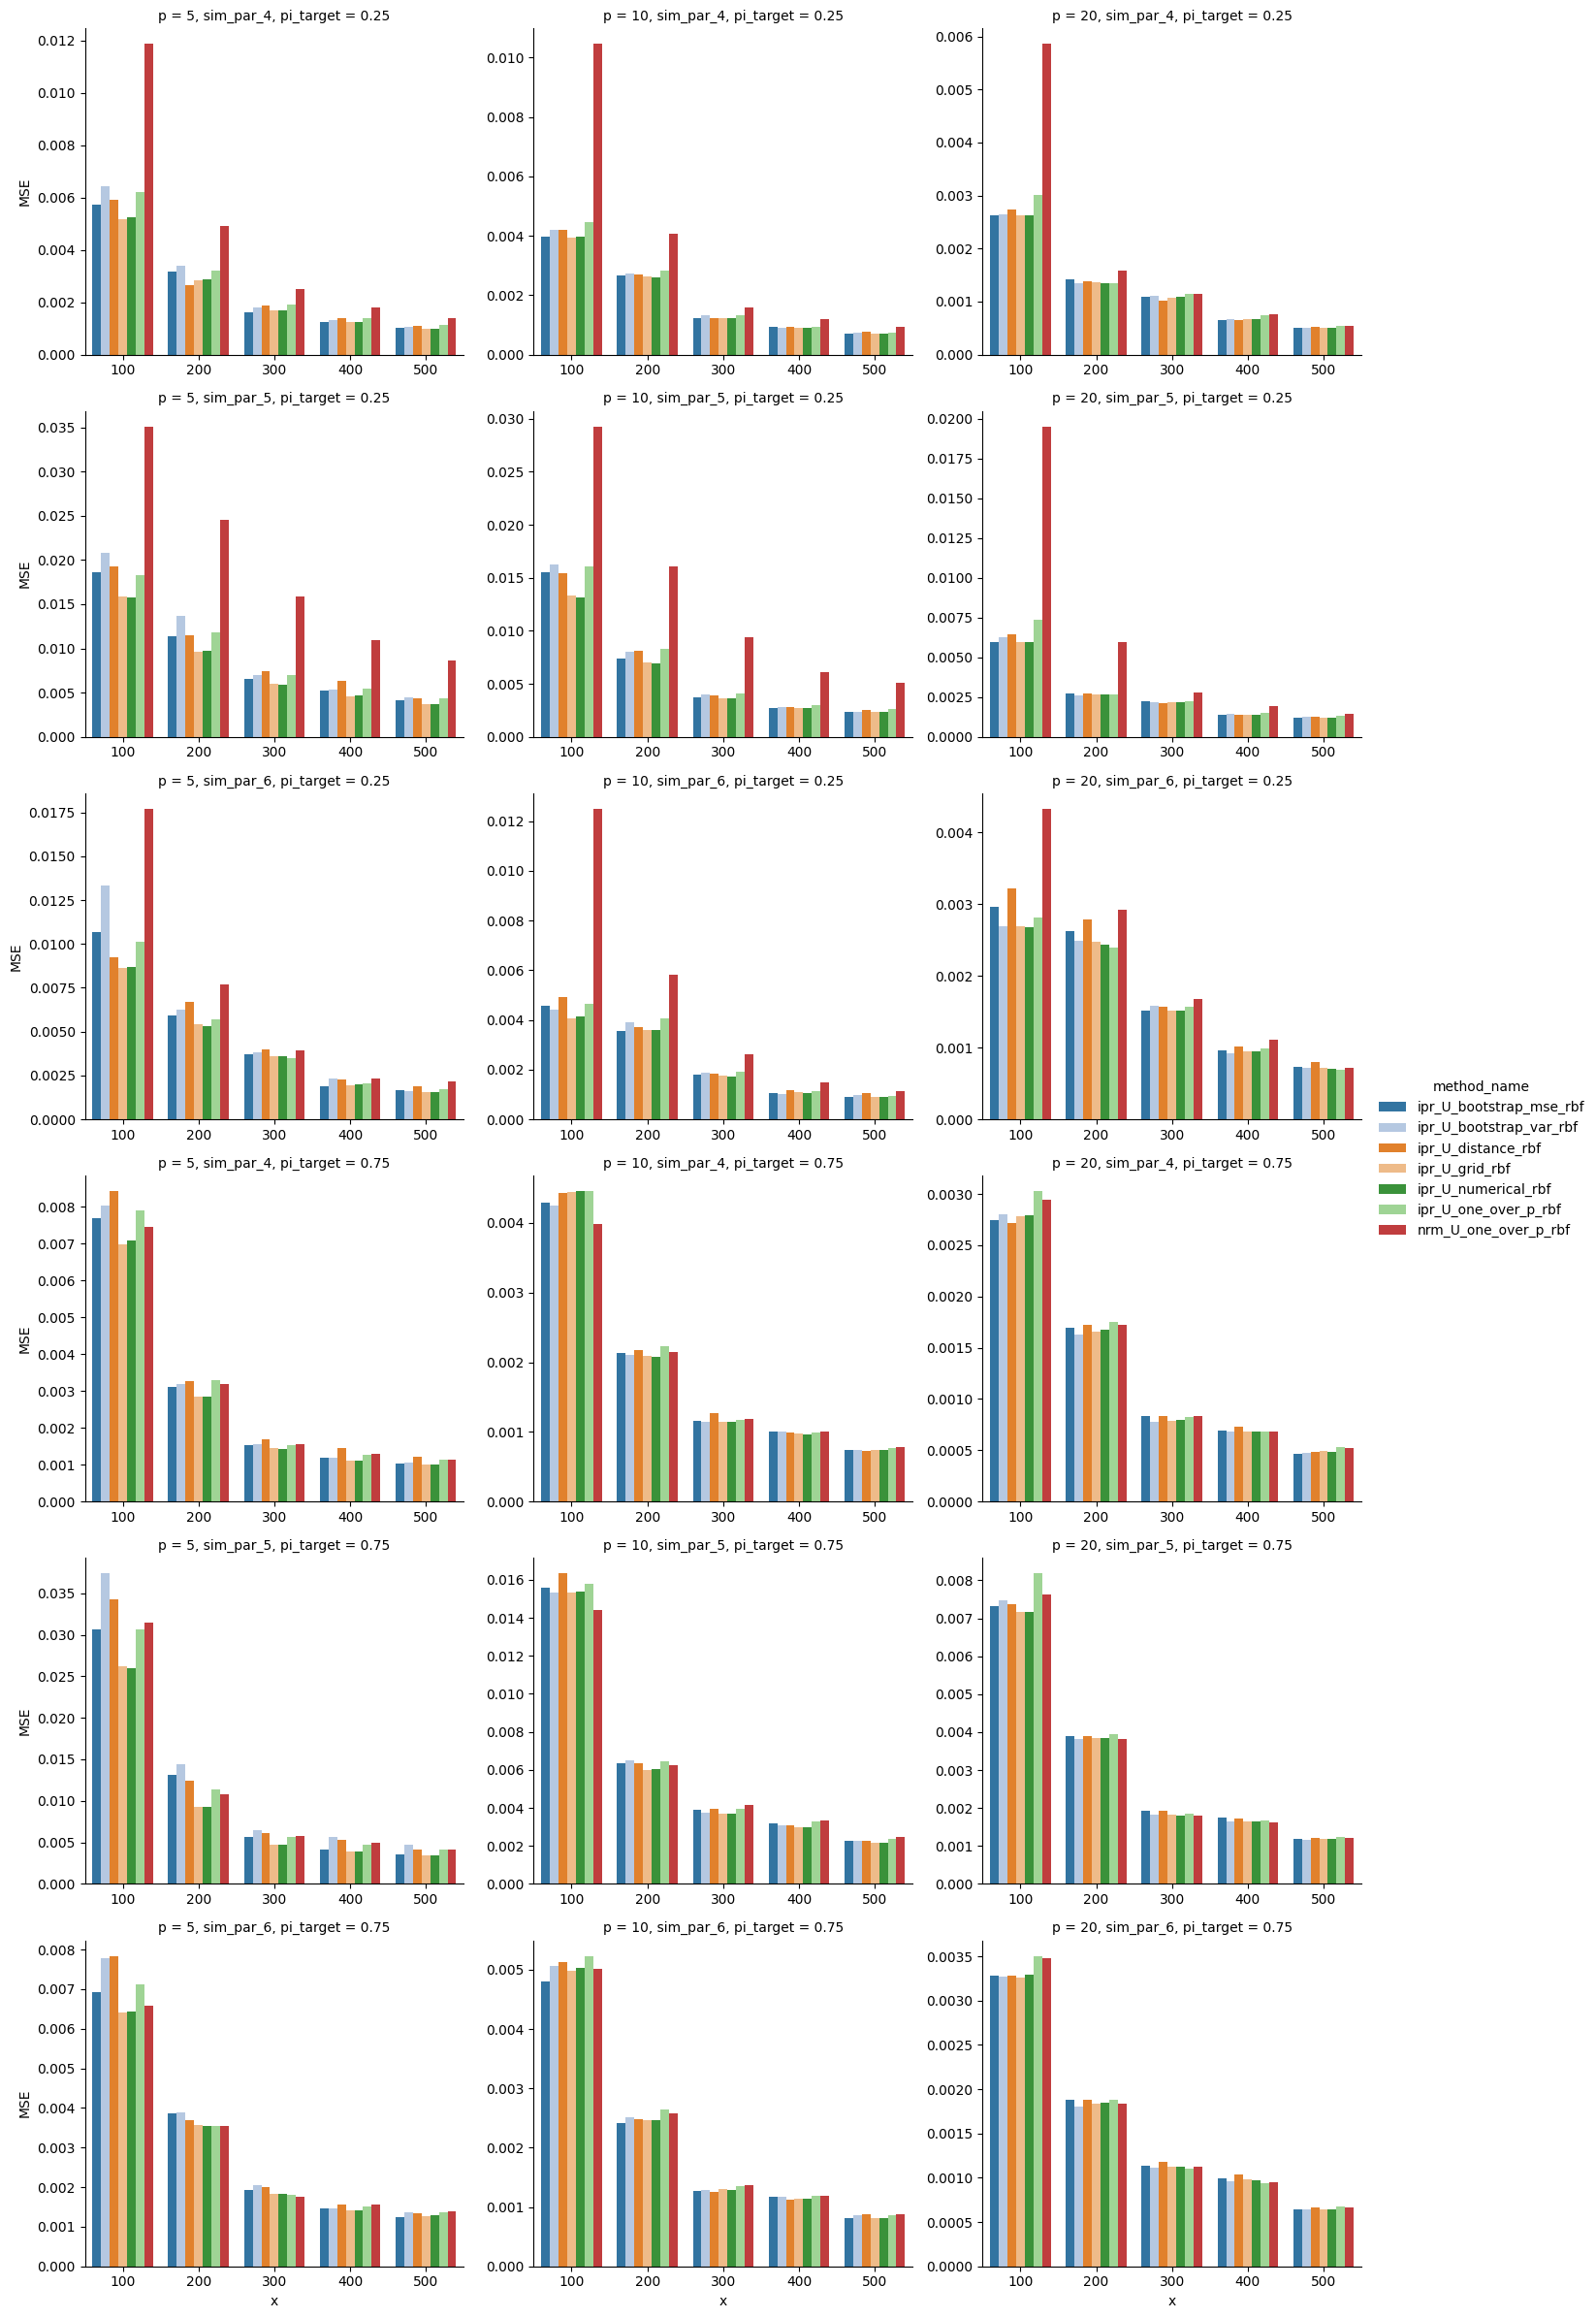

In [13]:
plot_mse(df_mse, ['U'])

### Figure 7

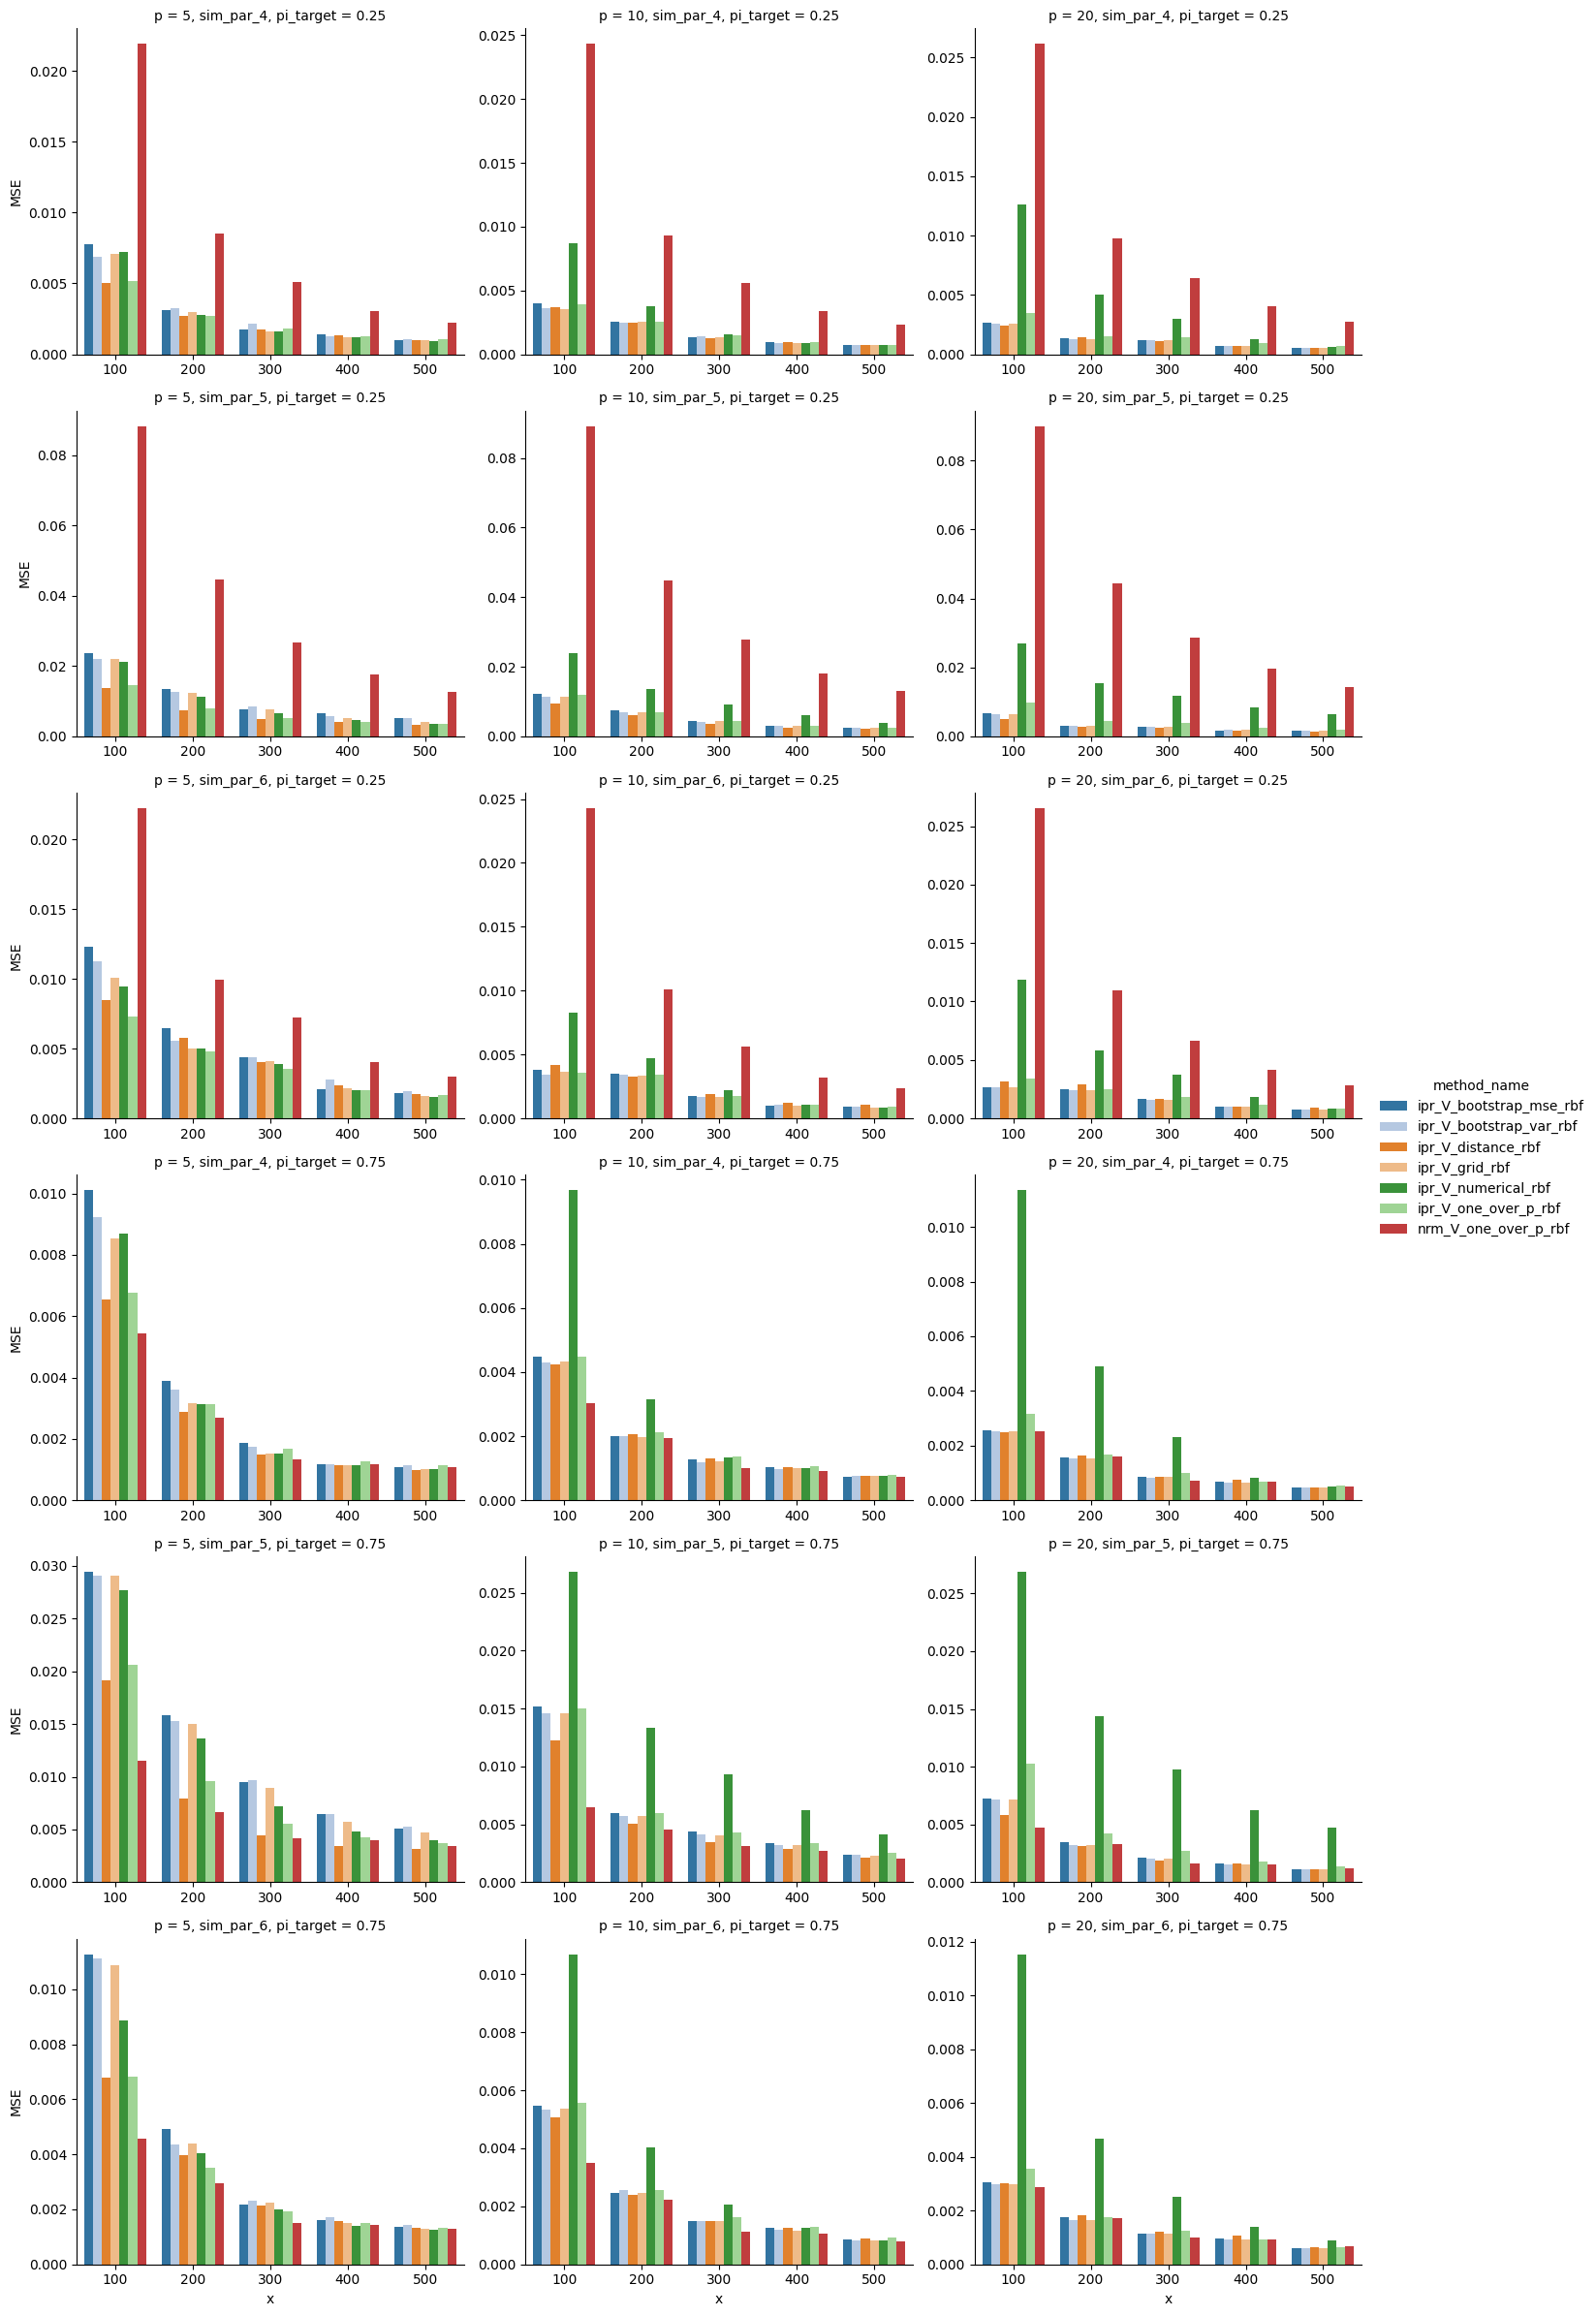

In [14]:
plot_mse(df_mse, ['V'])

### Figure 8

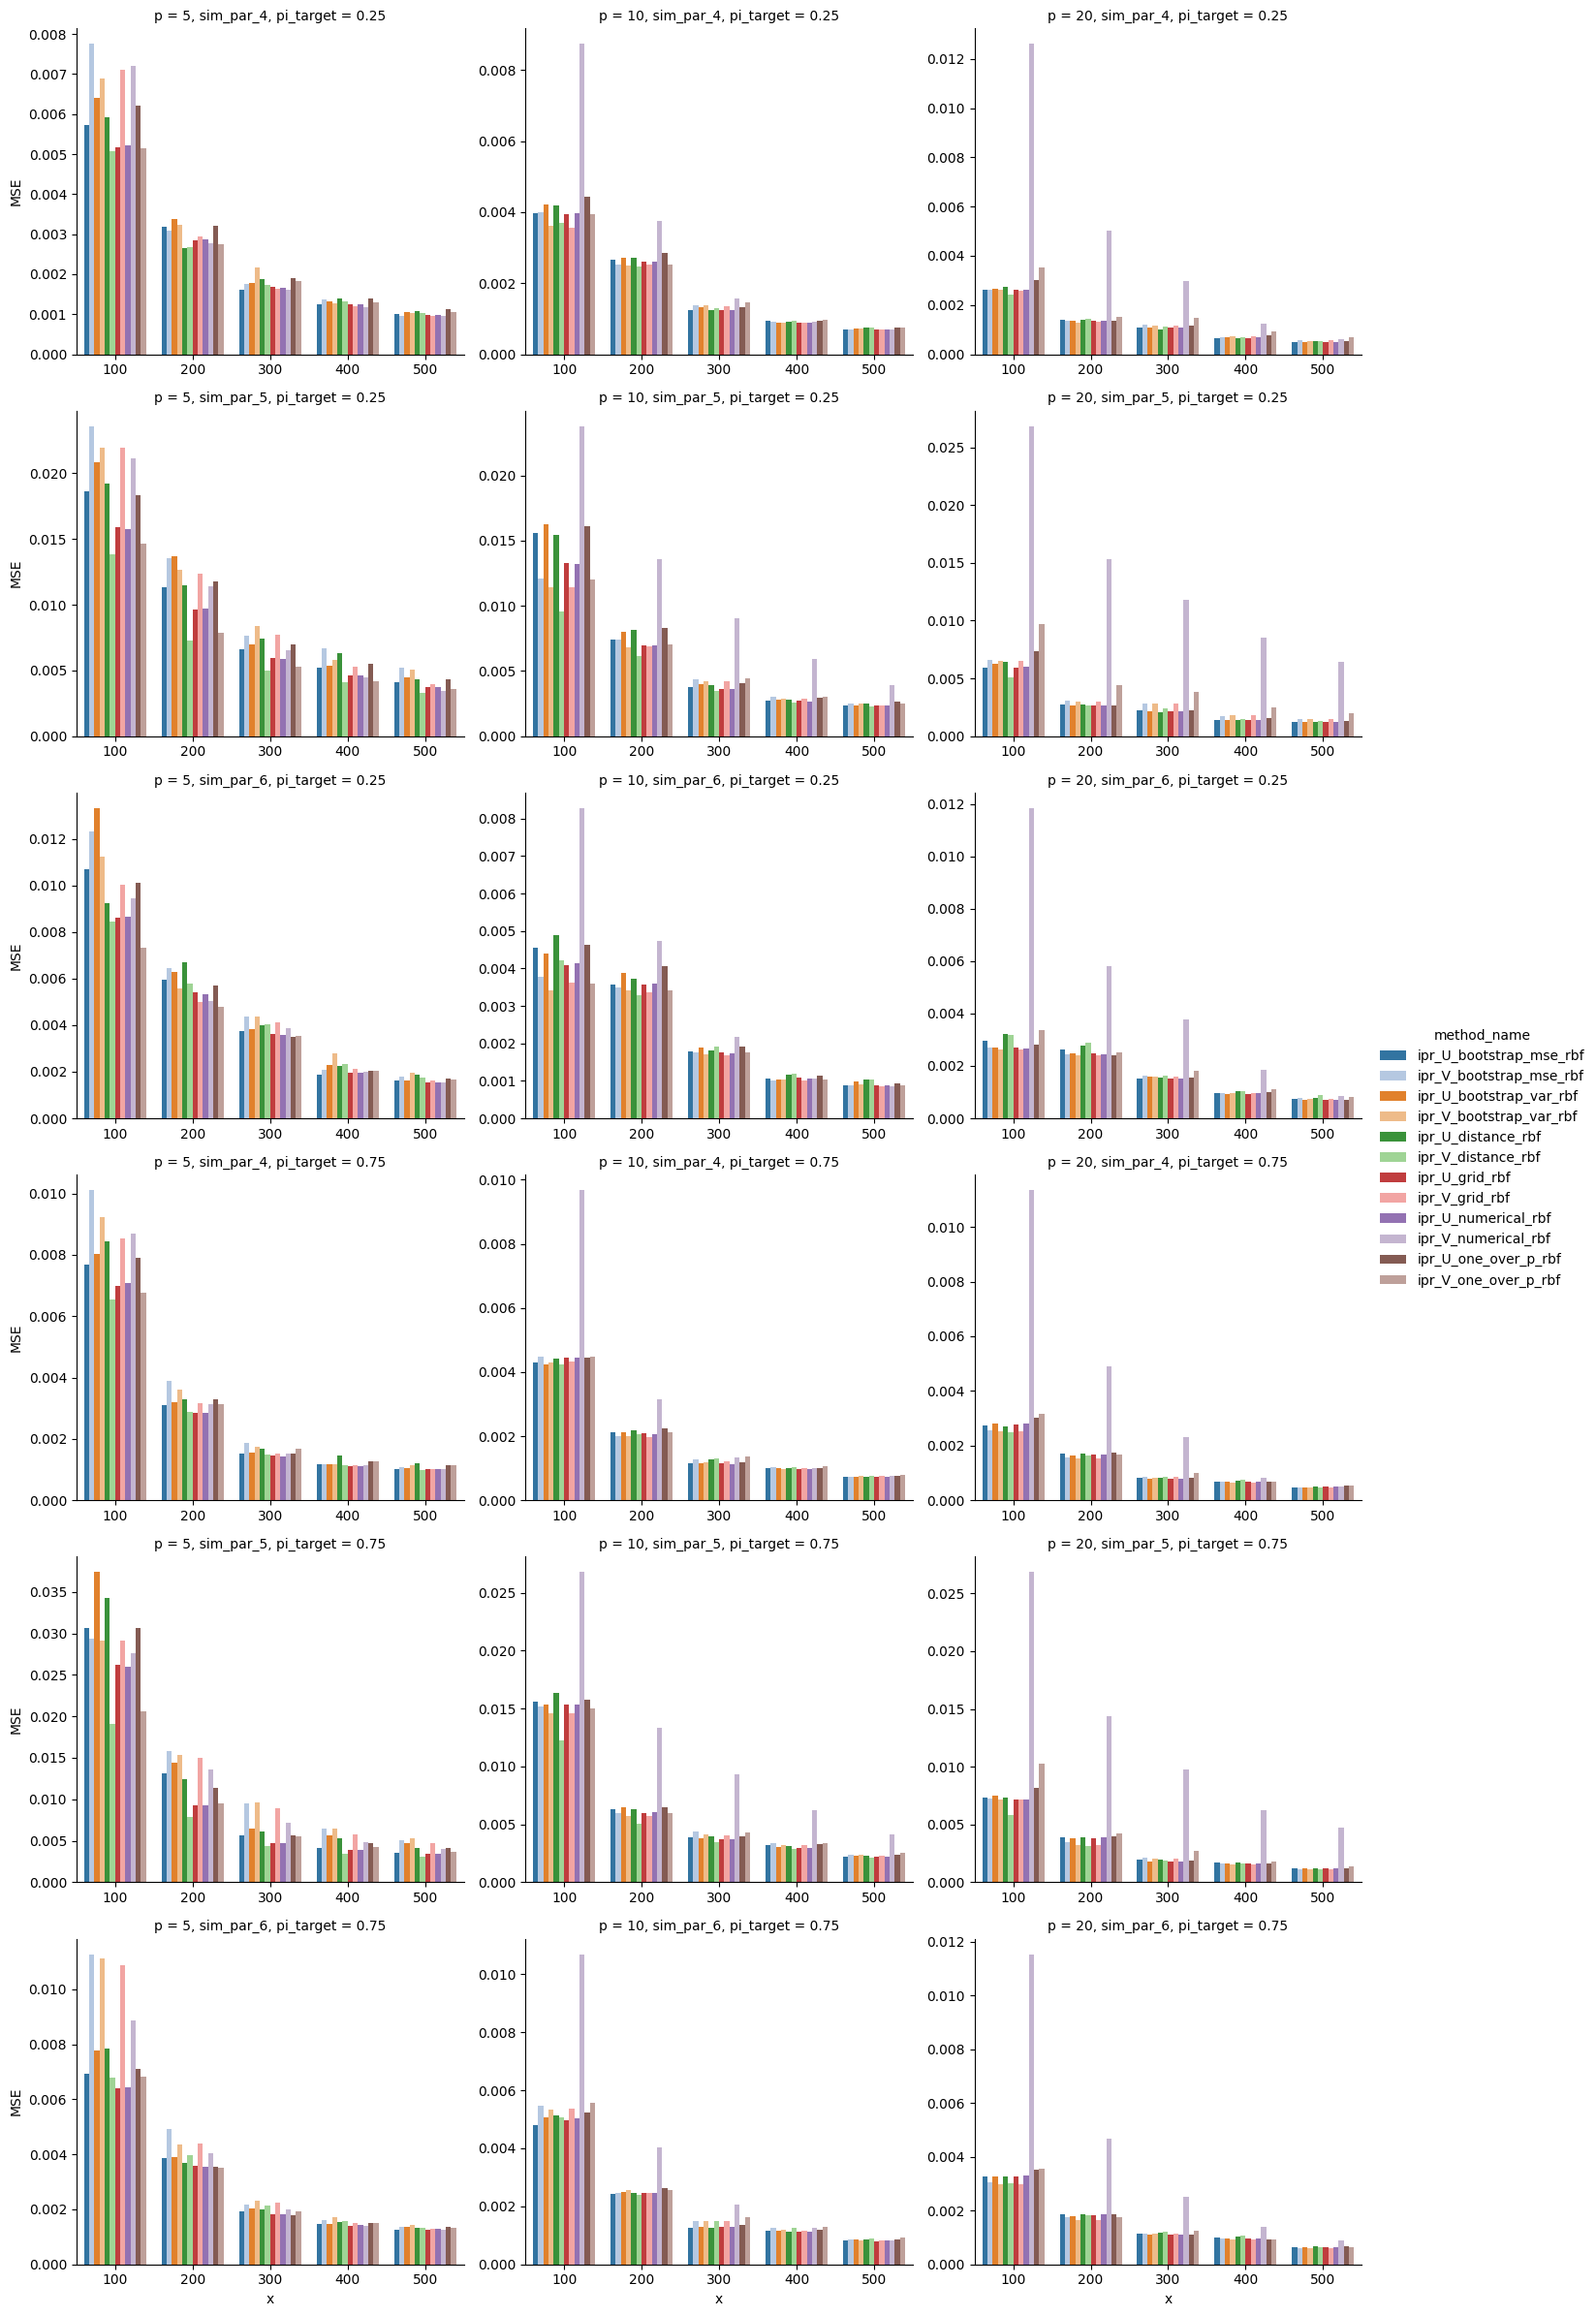

In [15]:
plot_mse(df_mse, ['U', 'V'], estimator=['ipr'])

## Heavy tail distribution

In [34]:
df_mse = pd.read_csv('results/results_heavy_tail_mse.csv', index_col=0)

### Figure 9

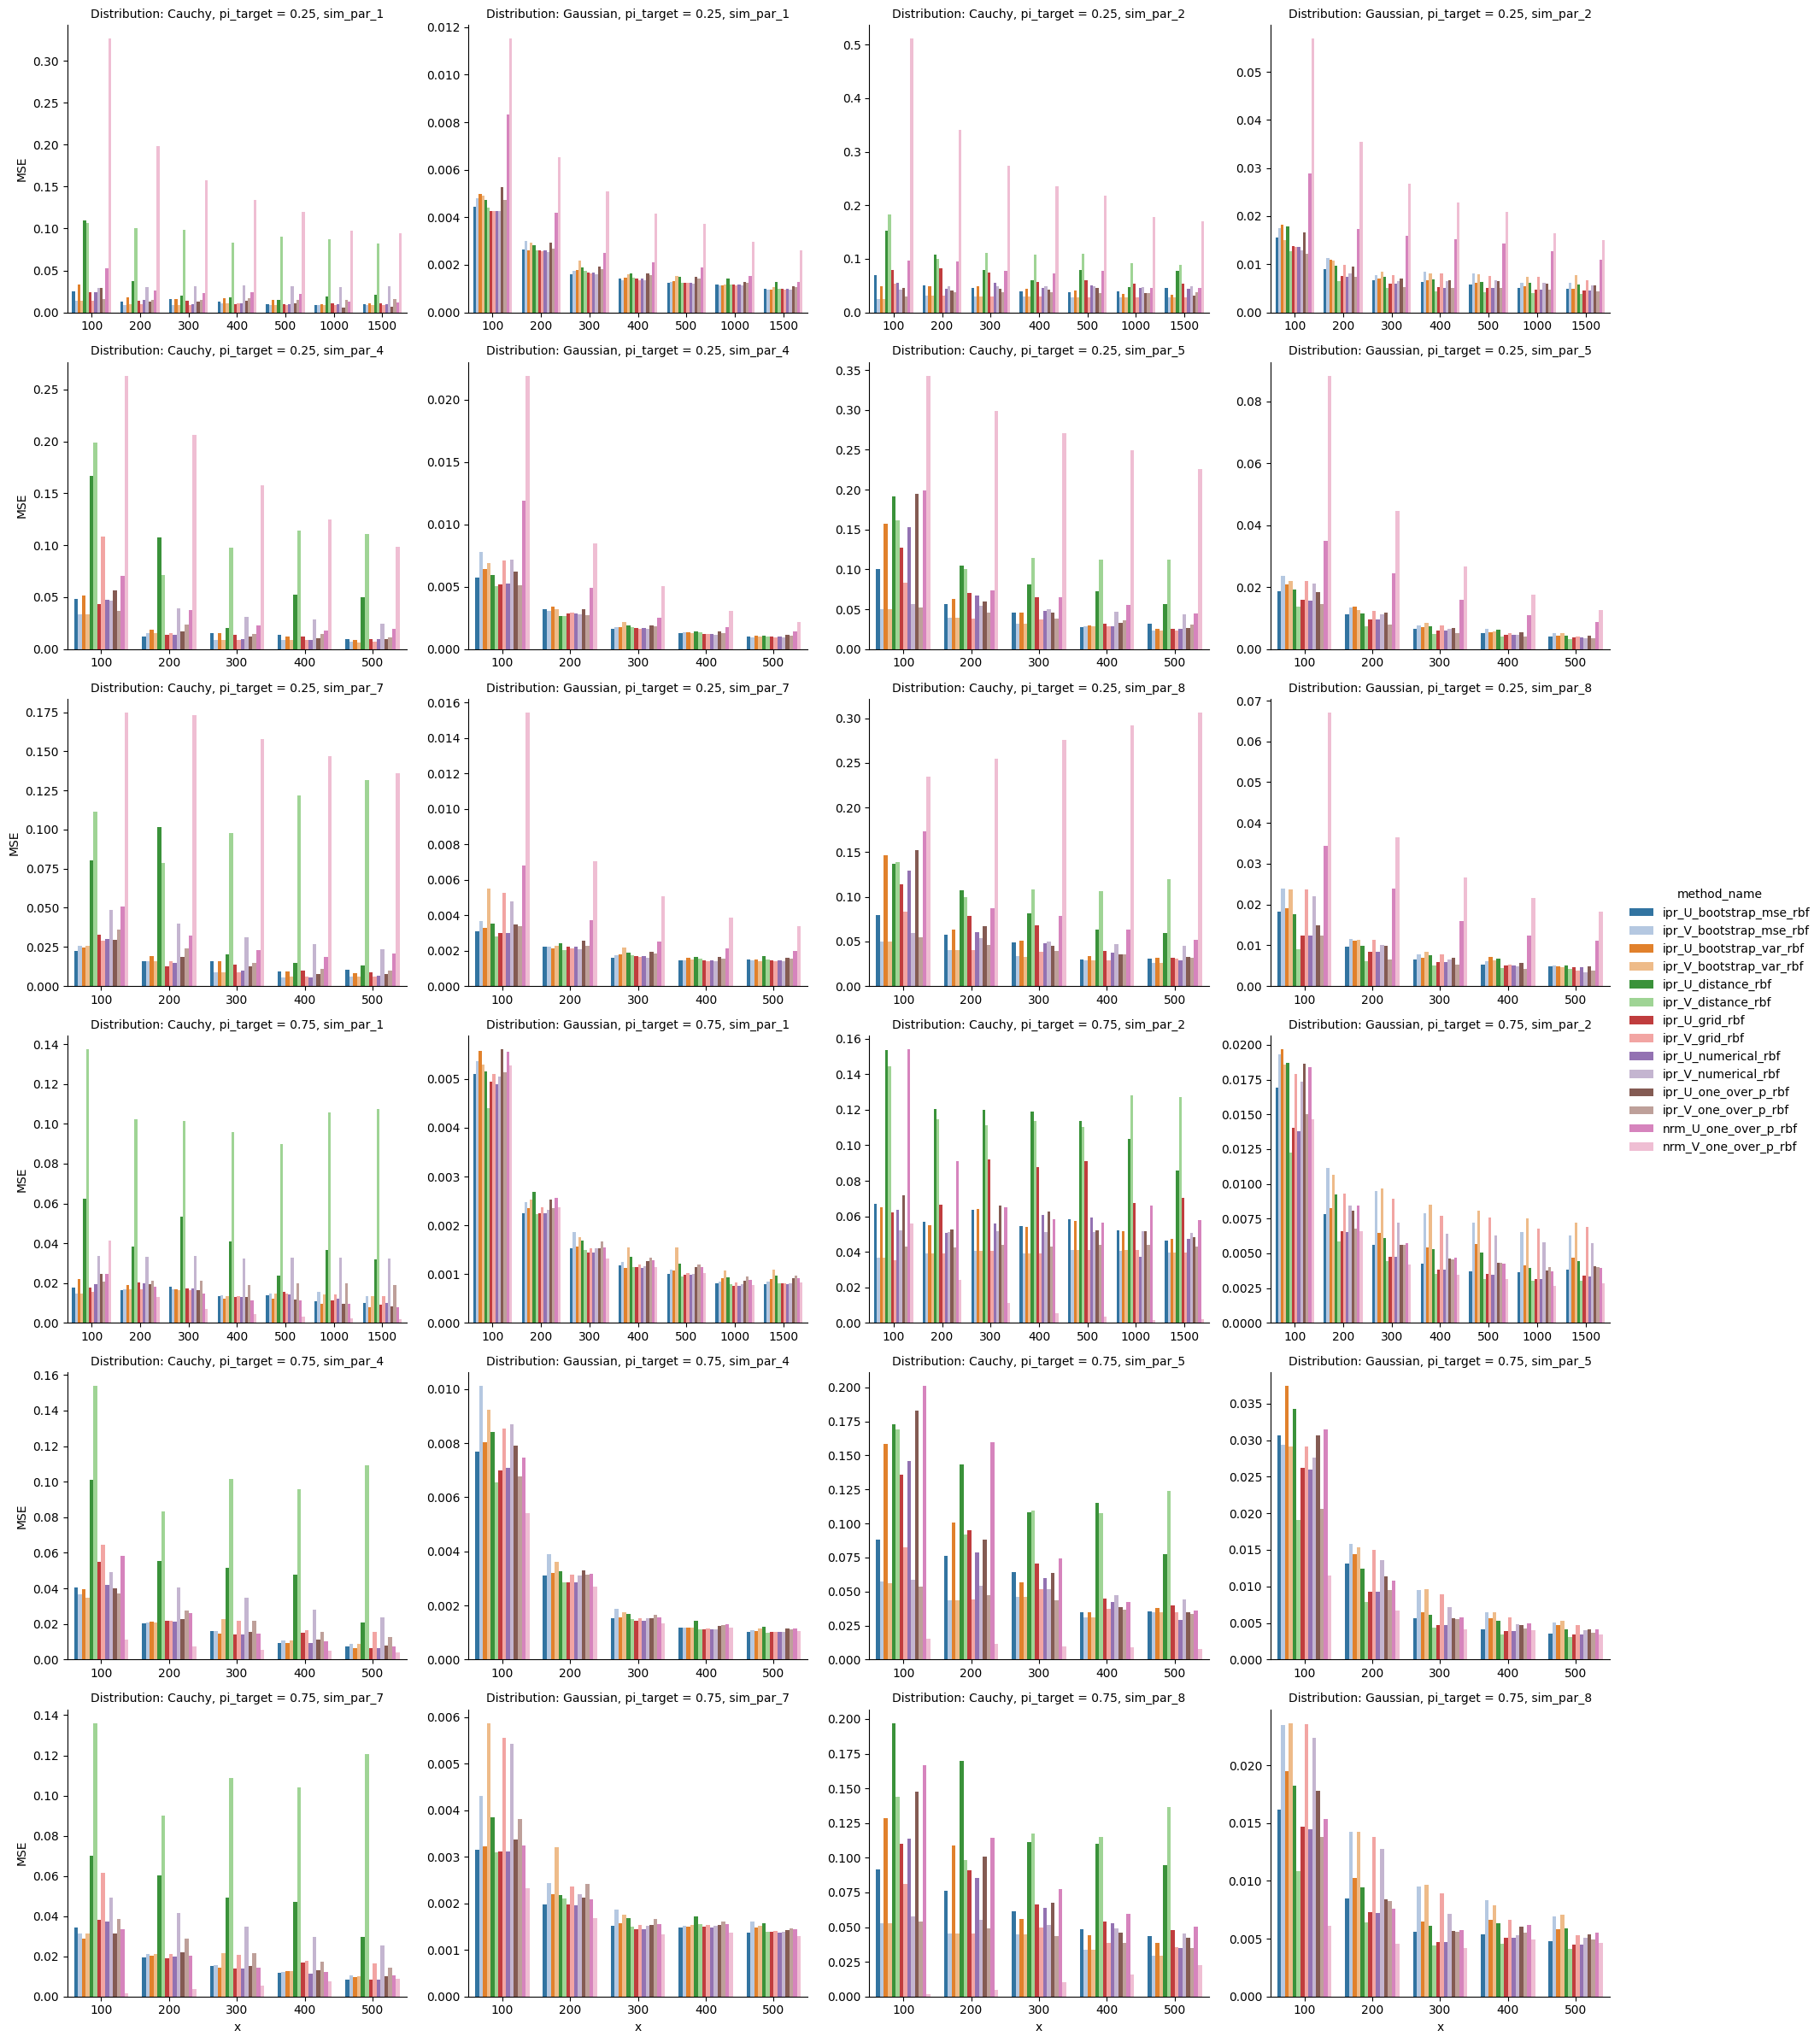

In [36]:
plot_mse(df_mse, ['U', 'V'], col_wrap=4)

# TIME

In [17]:
df = pd.read_csv('results/results_standard_all.csv', index_col=0)

In [18]:
df['log_time'] = np.log(df['time'])

In [19]:
df = df.sort_values(by=["pi_target", "sim_scenario"])
df['facet_blocks'] = df['sim_scenario'] + ", pi_target = " + df['pi_target'].astype(str)

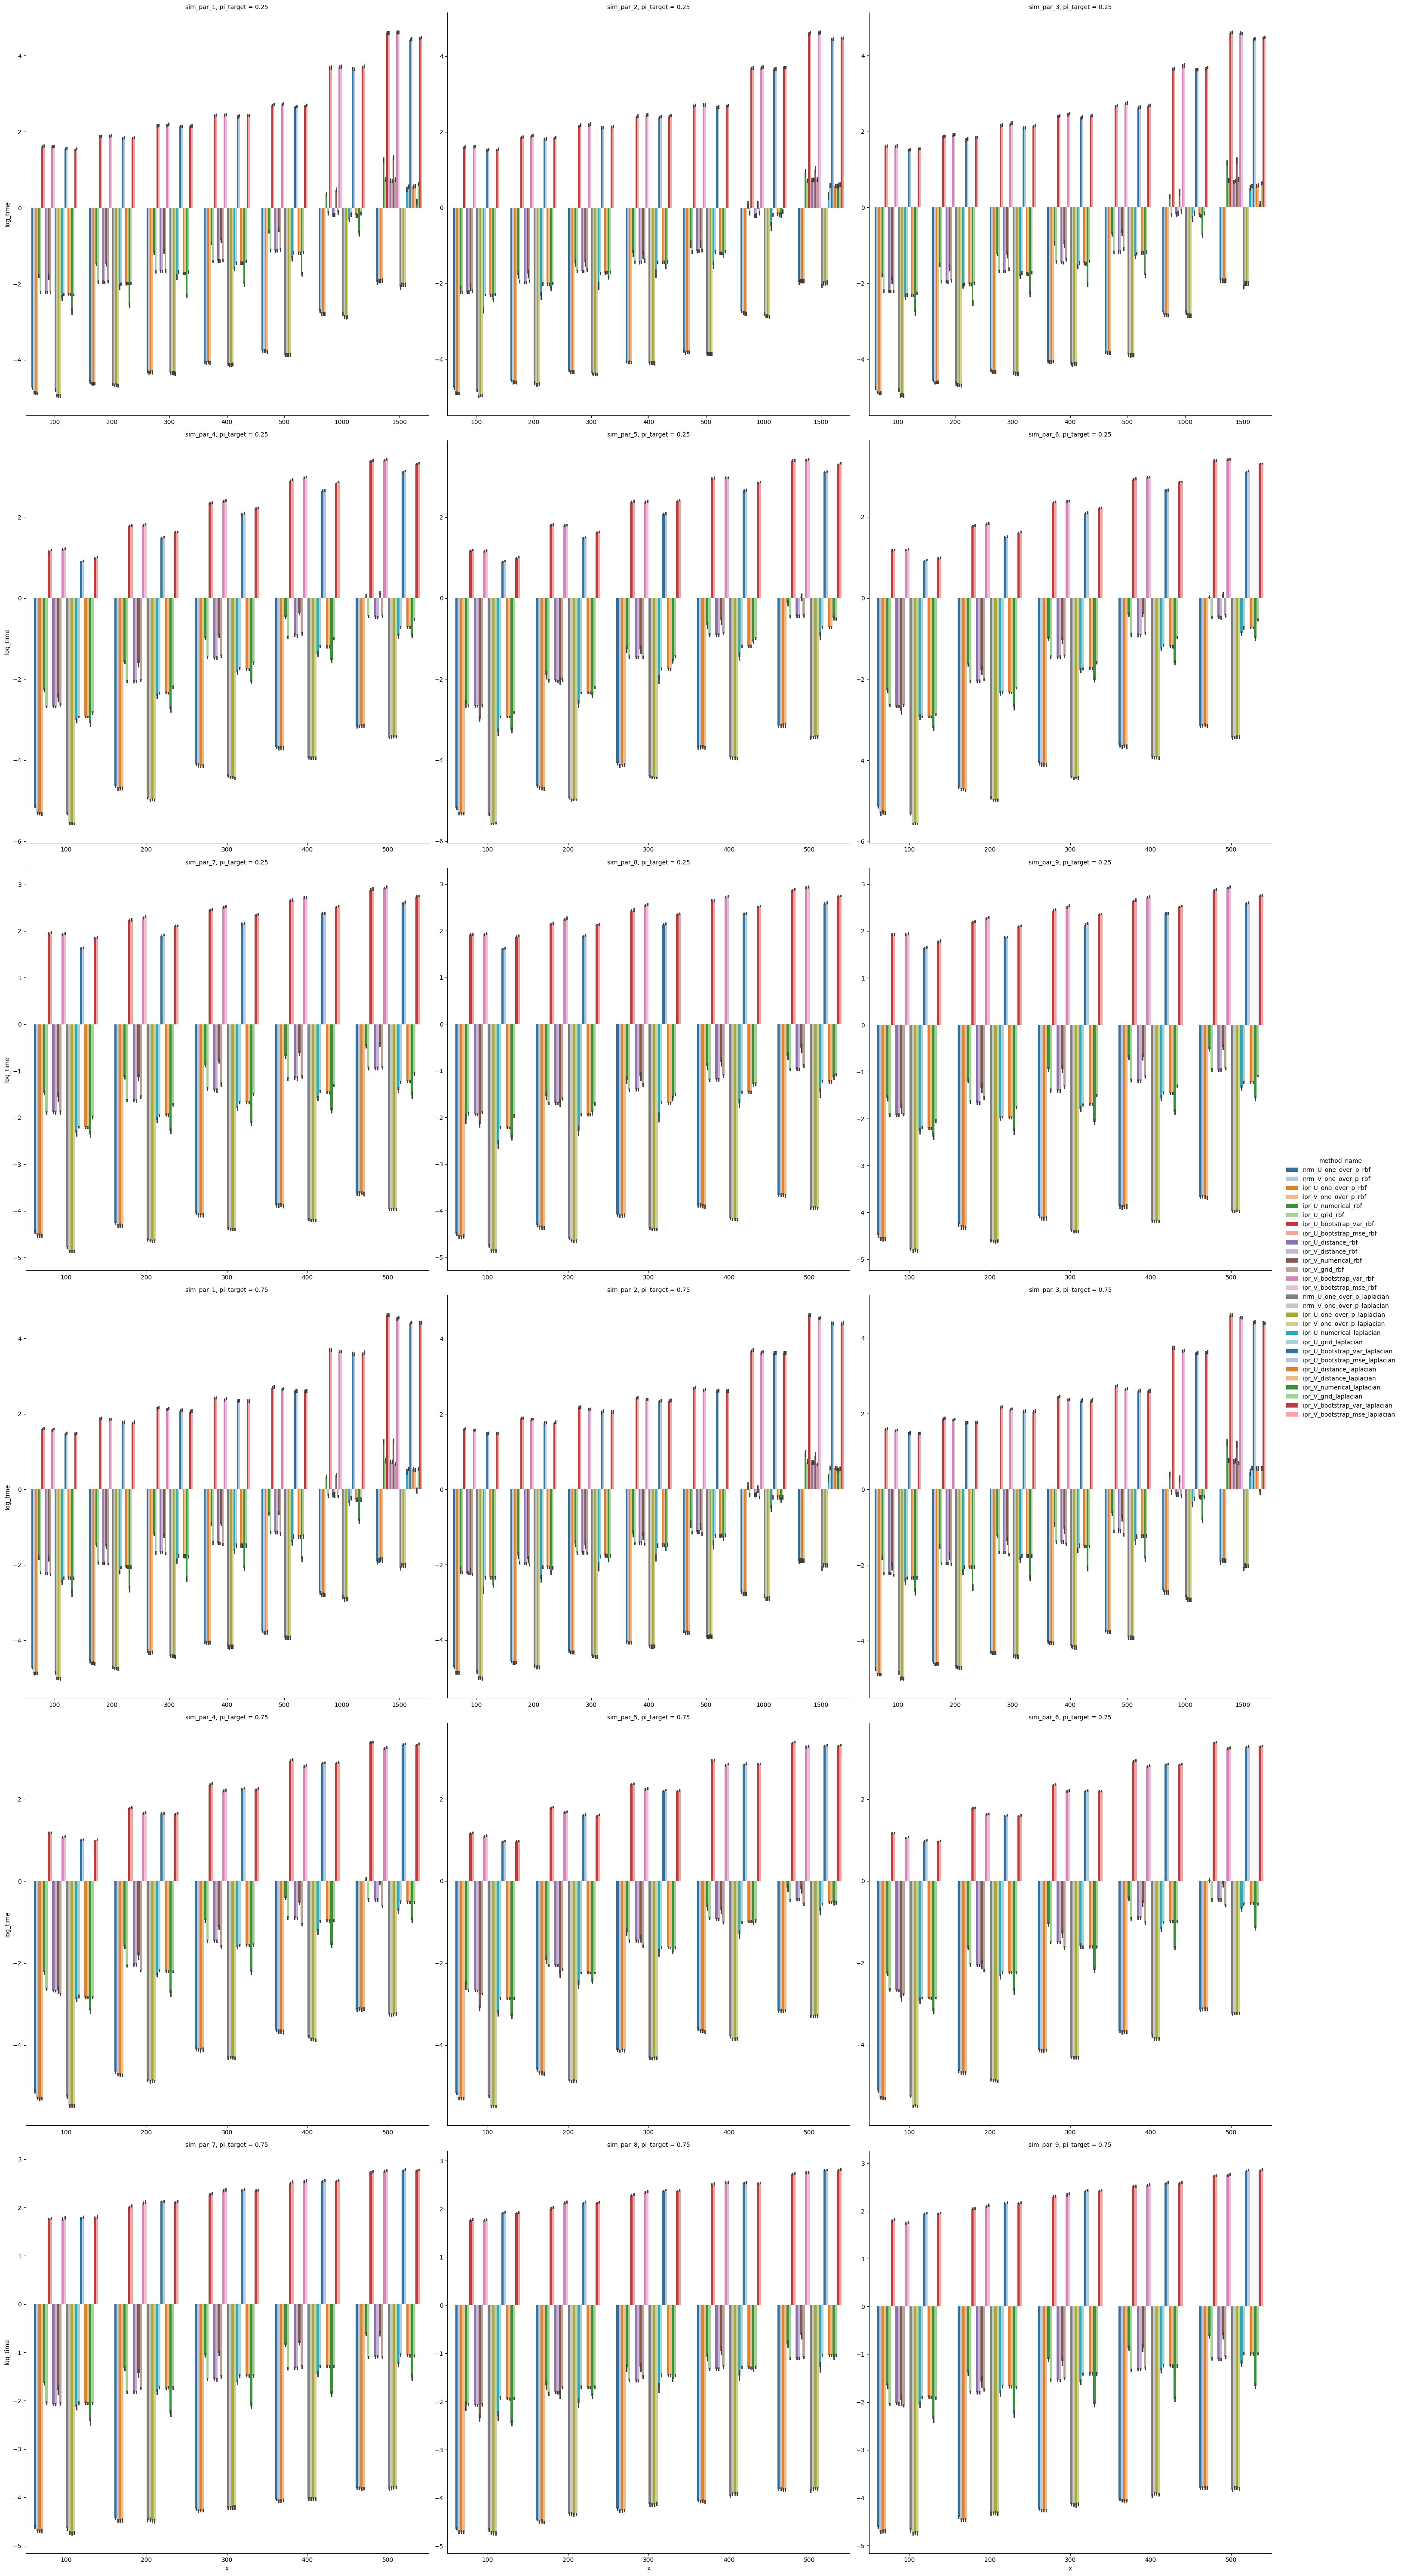

In [20]:
g = sns.catplot(data=df,
    x="x",  
    y="log_time",              
    hue="method_name",
    palette='tab20',
    col="facet_blocks",         
    kind="bar",
    height=10,
    # aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

In [21]:
df_time = df[(df['sim_scenario'] == 'sim_par_1') & (df['pi_target'] == 0.25)]

In [22]:
df_time = df_time[['time', 'gamma_selection_name', 'type', 'n_target', 'estimator', 'kernel']].groupby(['gamma_selection_name', 'type', 'n_target', 'estimator', 'kernel']).agg('mean').reset_index()

In [23]:
df_time['my_time'] = np.nan
df_time.loc[df_time['gamma_selection_name'] == 'one_over_p', 'my_time'] = 1
df_time.loc[df_time['gamma_selection_name'] == 'grid', 'my_time'] = 13 + 1
df_time.loc[df_time['gamma_selection_name'] == 'bootstrap_var', 'my_time'] = 13*50 + 1
df_time.loc[df_time['gamma_selection_name'] == 'bootstrap_mse', 'my_time'] = 13*50 + 50 + 1
df_time.loc[df_time['gamma_selection_name'] == 'distance', 'my_time'] = 13 + 1

In [24]:
for i in range(len(df_time)):
    df_time['my_time'] = df_time['my_time']

In [25]:
df_time['my_time'] = df_time['my_time']*0.03903

In [26]:
df_time.loc[df_time['gamma_selection_name'] == 'one_over_p', 'time']

140    0.007255
141    0.007806
142    0.008505
143    0.008989
144    0.009601
145    0.009985
146    0.009703
147    0.010596
148    0.013169
149    0.013541
150    0.013452
151    0.013824
152    0.016236
153    0.017550
154    0.016524
155    0.017347
156    0.021300
157    0.023486
158    0.021462
159    0.023837
160    0.056987
161    0.063161
162    0.062745
163    0.067272
164    0.135147
165    0.150575
166    0.126471
167    0.144549
168    0.007209
169    0.007719
170    0.007277
171    0.007915
172    0.009416
173    0.010005
174    0.009576
175    0.010013
176    0.013048
177    0.013539
178    0.013185
179    0.013331
180    0.016537
181    0.017197
182    0.016315
183    0.017182
184    0.021537
185    0.023033
186    0.021260
187    0.023502
188    0.058342
189    0.063056
190    0.057953
191    0.062905
192    0.135294
193    0.152278
194    0.135727
195    0.150258
Name: time, dtype: float64

<Axes: xlabel='my_time', ylabel='time'>

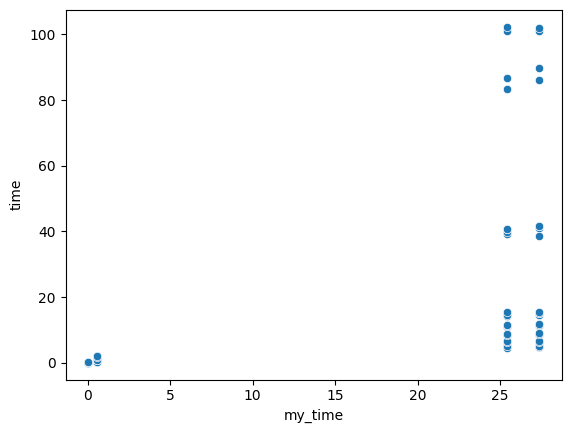

In [27]:
sns.scatterplot(df_time, x='my_time', y='time')